# **NOTEBOOK FOR `ANALYSIS` OF `OULAD` DATA**
***

- ***Goal is to find student dropout factors***

## ***Starting of Analysis***

### ***Data Import, Creating Connection and Checking the data***

In [1]:
import os
from pathlib import Path

def get_project_root(project_name="ranojoy_data_analytics_projects"):
    """
    Universally finds the project root.
    1. Checks if we are inside the project (standard usage).
    2. Checks if we are above the project (your specific usage).
    """
    current_path = Path.cwd()

    # CASE 1: Standard Usage (Running from inside the repo)
    if project_name in str(current_path):
        while current_path.name != project_name:
            current_path = current_path.parent
        return current_path

    # CASE 2: Your Setup (Running from 'Machine' or a parent folder)
    # We search specifically for the project folder inside the current directory
    # limiting depth to 4 levels to keep it fast.
    else:
        # rglob searches recursively for the folder name
        for path in current_path.rglob(project_name):
            if path.is_dir():
                return path
        
        raise FileNotFoundError(f"Could not find project: {project_name}")

# --- USAGE ---
repo_root = get_project_root()

data_path = repo_root / "Beyond Oulad - Students Dropout"
print(data_path)

C:\Users\Rano's PC\Machine\github_repo_cloned\ranojoy_data_analytics_projects\Beyond Oulad - Students Dropout


In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
sys.path.append(os.path.abspath(f"{data_path}"))

import src.plots as P
import src.stat_tests as S

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
file_path = data_path / "data" / "processed_data" / "processed_oulad_data.csv"

data = pd.read_csv(file_path)

In [5]:
data.head()

module presentation gender student_region qualification imd_band age_band  \
0    AAA        2013J      M    East Anglia            HE  90-100%     55<=   
1    AAA        2013J      F       Scotland            HE   20-30%    35-55   
2    AAA        2013J      F     North West       A Level   30-40%    35-55   
3    AAA        2013J      F     South East       A Level   50-60%    35-55   
4    AAA        2013J      F  West Midlands       Below A   50-60%     0-35   

   prev_attempts  credits disability  ... registration  unregistration  \
0              0      240          N  ...       -159.0             NaN   
1              0       60          N  ...        -53.0             NaN   
2              0       60          Y  ...        -92.0            12.0   
3              0       60          N  ...        -52.0             NaN   
4              0       60          N  ...       -176.0             NaN   

   vle_used  clicks  assessments  attempted_assessment  \
0      55.0   934.0            5                     5   
1      84.0  1435.0            5                     5   
2      22.0   281.0            0                     0   
3      82.0  2158.0            5                     5   
4      66.0  1034.0            5                     5   

   non_attempted_assessment  score  clicks_per_vle  attempt_pct  
0                         0   82.0           16.98        100.0  
1                         0   66.4           17.08        100.0  
2                         0    0.0           12.77          0.0  
3                         0   76.0           26.32        100.0  
4                         0   54.4           15.67        100.0  

[5 rows x 21 columns]

### ***Initial Data Health Check***

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   module                    32593 non-null  object 
 1   presentation              32593 non-null  object 
 2   gender                    32593 non-null  object 
 3   student_region            32593 non-null  object 
 4   qualification             32593 non-null  object 
 5   imd_band                  31482 non-null  object 
 6   age_band                  32593 non-null  object 
 7   prev_attempts             32593 non-null  int64  
 8   credits                   32593 non-null  int64  
 9   disability                32593 non-null  object 
 10  final_result              32593 non-null  object 
 11  registration              32593 non-null  float64
 12  unregistration            10063 non-null  float64
 13  vle_used                  32593 non-null  float64
 14  clicks

In [7]:
rows,columns = data.shape
print(f"Rows -> {rows}")
print(f"Columns -> {columns}")

Rows -> 32593
Columns -> 21


In [8]:
data.isnull().sum()[data.isnull().sum()>0].reset_index(name = 'null_counts')

index  null_counts
0        imd_band         1111
1  unregistration        22530

***There are `null` values***

In [9]:
data.duplicated().sum()

np.int64(2)

***There are 2 `duplicated` values***

In [10]:
data.describe().round(2).T

count     mean      std    min     25%     50%  \
prev_attempts             32593.0     0.16     0.48    0.0    0.00    0.00   
credits                   32593.0    79.76    41.07   30.0   60.00   60.00   
registration              32593.0   -69.39    49.23 -322.0 -100.00  -57.00   
unregistration            10063.0    49.79    82.48 -365.0   -2.00   27.00   
vle_used                  32593.0    60.15    55.90    0.0   19.00   46.00   
clicks                    32593.0  1215.14  1692.60    0.0  142.00  602.00   
assessments               32593.0     5.34     4.33    0.0    1.00    5.00   
attempted_assessment      32593.0     5.28     4.34    0.0    1.00    5.00   
non_attempted_assessment  32593.0     0.06     0.53    0.0    0.00    0.00   
score                     32593.0    57.65    32.93    0.0   43.00   70.57   
clicks_per_vle            32593.0    15.17    14.78    0.0    6.09   12.00   
attempt_pct               32593.0    78.09    41.17    0.0  100.00  100.00   

                              75%      max  
prev_attempts                0.00      6.0  
credits                    120.00    655.0  
registration               -29.00    167.0  
unregistration             109.00    444.0  
vle_used                    86.00    413.0  
clicks                    1585.00  24139.0  
assessments                  9.00     14.0  
attempted_assessment         9.00     14.0  
non_attempted_assessment     0.00     12.0  
score                       82.40    100.0  
clicks_per_vle              20.45    314.0  
attempt_pct                100.00    100.0

***Knowledge from Initial Healht Check***

- in `date_unregistration` column the value is lower than minimum of `date_registration` which is indicating someone unregistered before registration, need to check that

In [11]:
data = data[~(data['unregistration']< data['registration'])]

In [12]:
data['final_result'].value_counts()

final_result
Stayed       22437
Withdrawn    10134
Name: count, dtype: int64

In [13]:
data[((data['unregistration'].isnull()) & (data['final_result'] != 'Stayed'))]

module presentation gender student_region qualification imd_band  \
6315     BBB        2014B      F      Yorkshire       Below A   40-50%   
6484     BBB        2014J      F     South West       Below A  90-100%   
6601     BBB        2014J      F          Wales            HE   80-90%   
7247     BBB        2014J      F     North West       Below A    0-10%   
7410     BBB        2014J      F    East Anglia       Below A   80-90%   
...      ...          ...    ...            ...           ...      ...   
29978    FFF        2014J      M         London       Below A    10-20   
30032    FFF        2014J      M        Ireland       A Level    10-20   
30562    GGG        2013J      F      Yorkshire       Below A   30-40%   
32149    GGG        2014J      F          South       Below A    10-20   
32411    GGG        2014J      F        Ireland       Below A   60-70%   

      age_band  prev_attempts  credits disability  ... registration  \
6315     35-55              0       60          N  ...        -17.0   
6484      0-35              0       60          N  ...        -25.0   
6601     35-55              0       60          N  ...        -24.0   
7247      0-35              0       60          N  ...       -113.0   
7410      0-35              0      120          N  ...       -162.0   
...        ...            ...      ...        ...  ...          ...   
29978    35-55              0      180          N  ...        -38.0   
30032    35-55              1       60          N  ...        -29.0   
30562     0-35              0       30          N  ...        -16.0   
32149    35-55              0       60          N  ...          2.0   
32411    35-55              0       30          N  ...         -9.0   

       unregistration  vle_used  clicks  assessments  attempted_assessment  \
6315              NaN       0.0     0.0            0                     0   
6484              NaN       4.0     7.0            0                     0   
6601              NaN      24.0   324.0            0                     0   
7247              NaN       0.0     0.0            0                     0   
7410              NaN       0.0     0.0            0                     0   
...               ...       ...     ...          ...                   ...   
29978             NaN      44.0   370.0            0                     0   
30032             NaN       3.0    17.0            0                     0   
30562             NaN      29.0   297.0            8                     8   
32149             NaN       1.0     1.0            0                     0   
32411             NaN       0.0     0.0            0                     0   

       non_attempted_assessment  score  clicks_per_vle  attempt_pct  
6315                          0   0.00            0.00          0.0  
6484                          0   0.00            1.75          0.0  
6601                          0   0.00           13.50          0.0  
7247                          0   0.00            0.00          0.0  
7410                          0   0.00            0.00          0.0  
...                         ...    ...             ...          ...  
29978                         0   0.00            8.41          0.0  
30032                         0   0.00            5.67          0.0  
30562                         0  59.38           10.24        100.0  
32149                         0   0.00            1.00          0.0  
32411                         0   0.00            0.00          0.0  

[93 rows x 21 columns]

- ***There are scenario when `withdrawn` happened but the `unregistration` date is not there, we are removing the rows***

In [14]:
data=data[~((data['unregistration'].isnull()) & (data['final_result'] != 'Stayed'))]

In [15]:
data[data.duplicated(keep=False)]

module presentation gender student_region qualification imd_band  \
6532    BBB        2014J      F          Wales       A Level   30-40%   
8256    BBB        2014J      F          Wales       A Level   30-40%   
8296    BBB        2014J      F         London       Nothing   20-30%   
8300    BBB        2014J      F         London       Nothing   20-30%   

     age_band  prev_attempts  credits disability  ... registration  \
6532     0-35              0       60          N  ...        -39.0   
8256     0-35              0       60          N  ...        -39.0   
8296     0-35              0       60          N  ...        -37.0   
8300     0-35              0       60          N  ...        -37.0   

      unregistration  vle_used  clicks  assessments  attempted_assessment  \
6532            12.0       0.0     0.0            0                     0   
8256            12.0       0.0     0.0            0                     0   
8296            12.0       0.0     0.0            0                     0   
8300            12.0       0.0     0.0            0                     0   

      non_attempted_assessment  score  clicks_per_vle  attempt_pct  
6532                         0    0.0             0.0          0.0  
8256                         0    0.0             0.0          0.0  
8296                         0    0.0             0.0          0.0  
8300                         0    0.0             0.0          0.0  

[4 rows x 21 columns]

- ***There is no primary key in this dataset,so maybe these are not actual duplicate, these are different students who enrolled together and did everythin together***

In [16]:
data['imd_band'].value_counts()

imd_band
20-30%     3640
30-40%     3523
10-20      3500
0-10%      3297
40-50%     3244
50-60%     3118
60-70%     2895
70-80%     2869
80-90%     2753
90-100%    2529
Name: count, dtype: int64

- ***I will impute the `imd_band` with `0%`***

In [17]:
data['imd_band'].fillna('0%',inplace=True)

In [18]:
data.isnull().sum()[data.isnull().sum()>0].reset_index(name = 'null_counts')

index  null_counts
0  unregistration        22437

In [74]:
data[data['attempted_assessment']+data['non_attempted_assessment'] != data['assessments']]

Empty DataFrame
Columns: [module, presentation, gender, student_region, qualification, imd_band, age_band, prev_attempts, credits, disability, final_result, registration, unregistration, vle_used, clicks, assessments, attempted_assessment, non_attempted_assessment, score, clicks_per_vle, attempt_pct]
Index: []

[0 rows x 21 columns]

In [19]:
data.select_dtypes(include='object').describe().T

count unique       top   freq
module          32478      7       BBB   7891
presentation    32478      4     2014J  11171
gender          32478      2         M  17806
student_region  32478     13  Scotland   3433
qualification   32478      5   A Level  14004
imd_band        32478     11    20-30%   3640
age_band        32478      3      0-35  22860
disability      32478      2         N  29329
final_result    32478      2    Stayed  22437

### **Univariate Analysis of data**

**module**

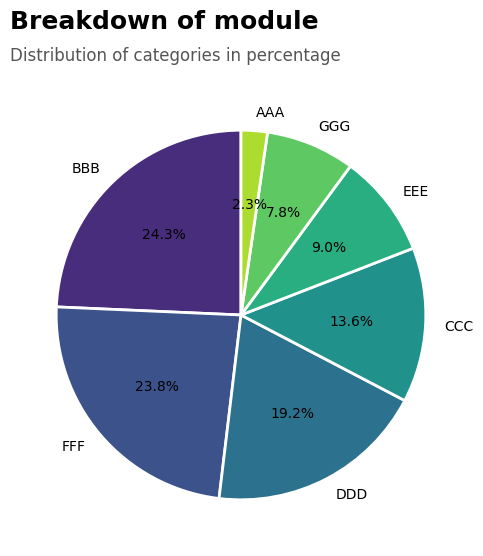

In [20]:
plt.figure(figsize=(6,6))
P.plot_pie('module',data)

- ***`BBB` and `FFF` have the most occurances***

**presentation**

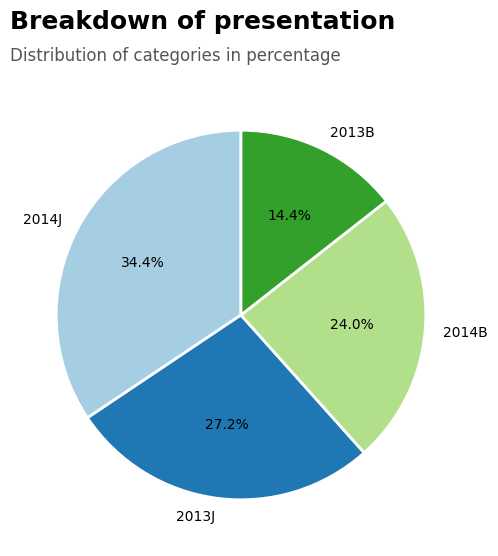

In [21]:
plt.figure(figsize=(6,6))
P.plot_pie('presentation',data)

- ***`2014J` is the most frequent value in presentation column***

**gender**

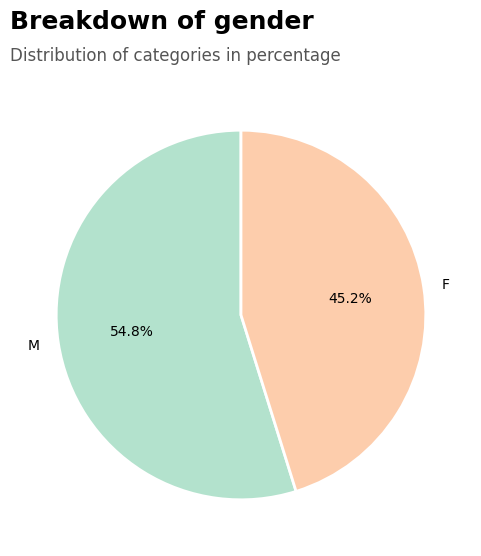

In [22]:
plt.figure(figsize=(6,6))
P.plot_pie('gender',data)

- ***`Male` gender have slighly more occurances than `female` gender***

**student_region**

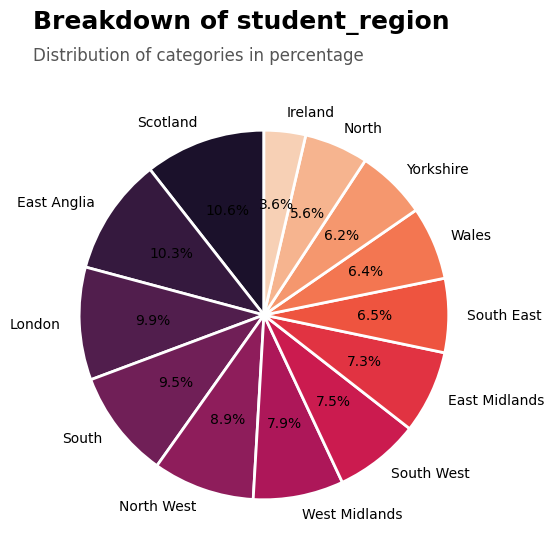

In [23]:
plt.figure(figsize=(6,6))
P.plot_pie('student_region',data)

In [24]:
data['student_region'].nunique()

13

- ***There are `13 unique values` in `student_region` column, values are nicely distributed so we are not going to reduce the classes***

**qualification**

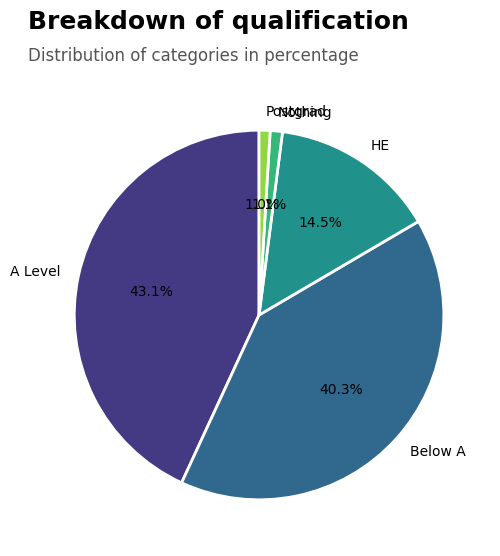

In [25]:
plt.figure(figsize=(6,6))
P.plot_pie('qualification',data)

In [26]:
data['qualification'].value_counts()

qualification
A Level     14004
Below A     13099
HE           4716
Nothing       347
Postgrad      312
Name: count, dtype: int64

- ***Classes which have low occurances, atleast have a `good sample size`, so I am keeping them***

**imd_band**

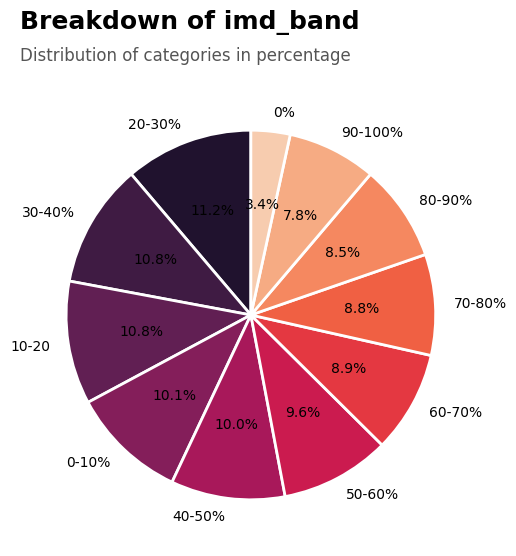

In [27]:
plt.figure(figsize=(6,6))
P.plot_pie('imd_band',data)

- ***`imd_band` is almost `equally distributed`, so I am keeping them***

**age_band**

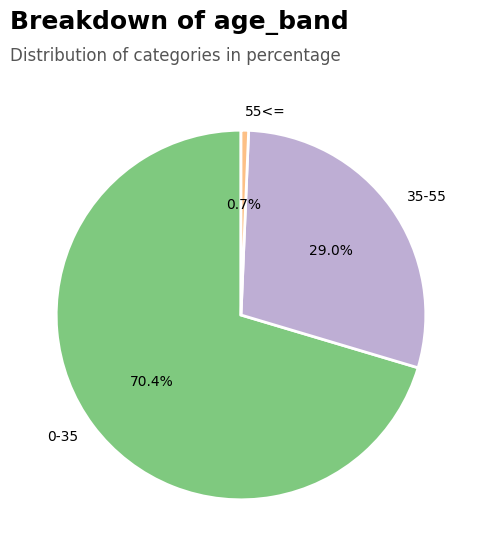

In [28]:
plt.figure(figsize=(6,6))
P.plot_pie('age_band',data)

In [29]:
data['age_band'].value_counts()

age_band
0-35     22860
35-55     9403
55<=       215
Name: count, dtype: int64

- ***Class with the lowest occurances still have good sample size, so keeping them***

**prev_attempts**

In [30]:
data['prev_attempts'].describe().round(2).reset_index()

index  prev_attempts
0  count       32478.00
1   mean           0.16
2    std           0.48
3    min           0.00
4    25%           0.00
5    50%           0.00
6    75%           0.00
7    max           6.00

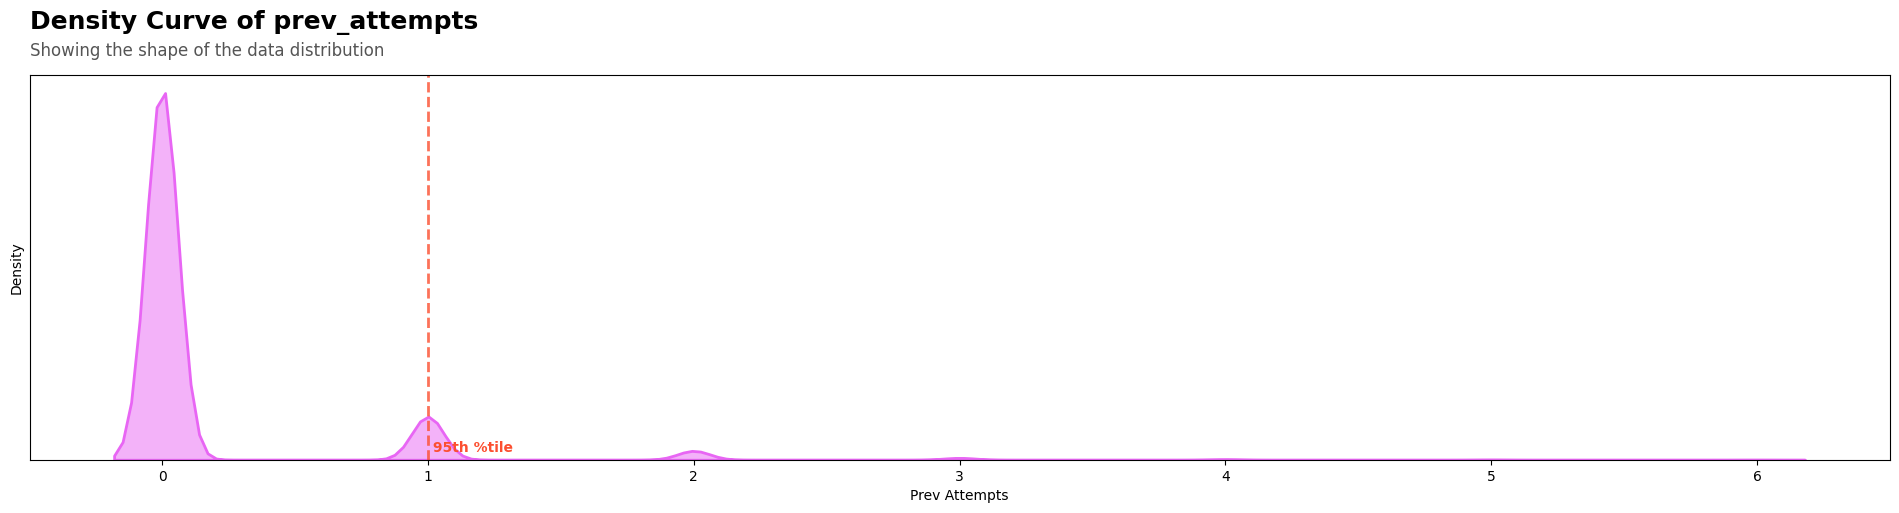

In [31]:
plt.figure(figsize=(24,5))
P.plot_kde('prev_attempts',data)

In [32]:
data['prev_attempts'].value_counts().div(len(data)).mul(100).round(2).reset_index(name = 'percentage')

prev_attempts  percentage
0              0       87.21
1              1       10.11
2              2        2.08
3              3        0.44
4              4        0.12
5              5        0.04
6              6        0.01

In [33]:
bins = [-1, 0, 1, 10]
labels = ['NONE', 'SINGLE', 'MULTIPLE']
data['prev_attempts'] = pd.cut(data['prev_attempts'], bins=bins, labels=labels)

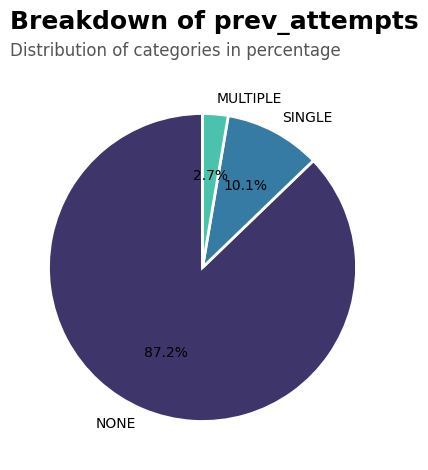

In [34]:
plt.figure(figsize=(24,5))
P.plot_pie('prev_attempts',data)

- ***Changed the type of `prev_attempts`, most of the observations are from `none` class***

**credits**

In [35]:
data['credits'].describe().round(2).reset_index()

index   credits
0  count  32478.00
1   mean     79.69
2    std     41.04
3    min     30.00
4    25%     60.00
5    50%     60.00
6    75%    120.00
7    max    655.00

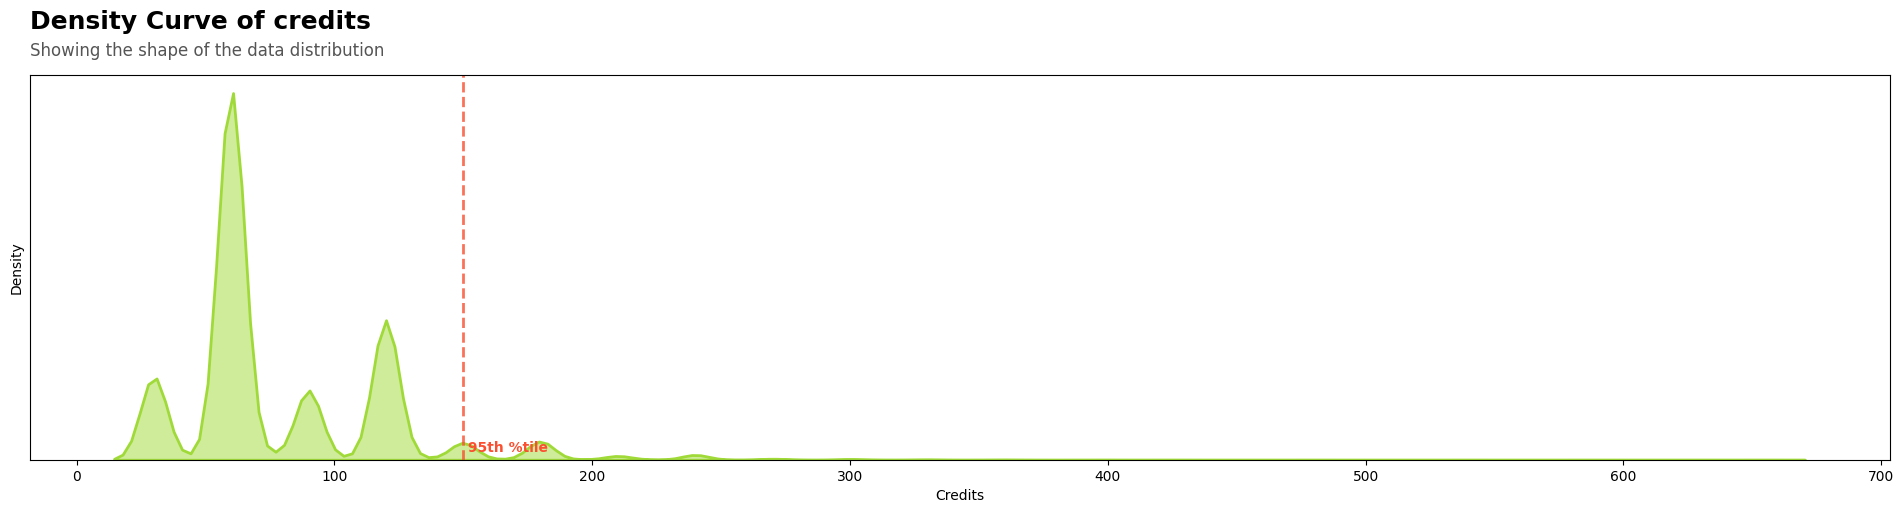

In [36]:
plt.figure(figsize=(24,5))
P.plot_kde('credits',data)

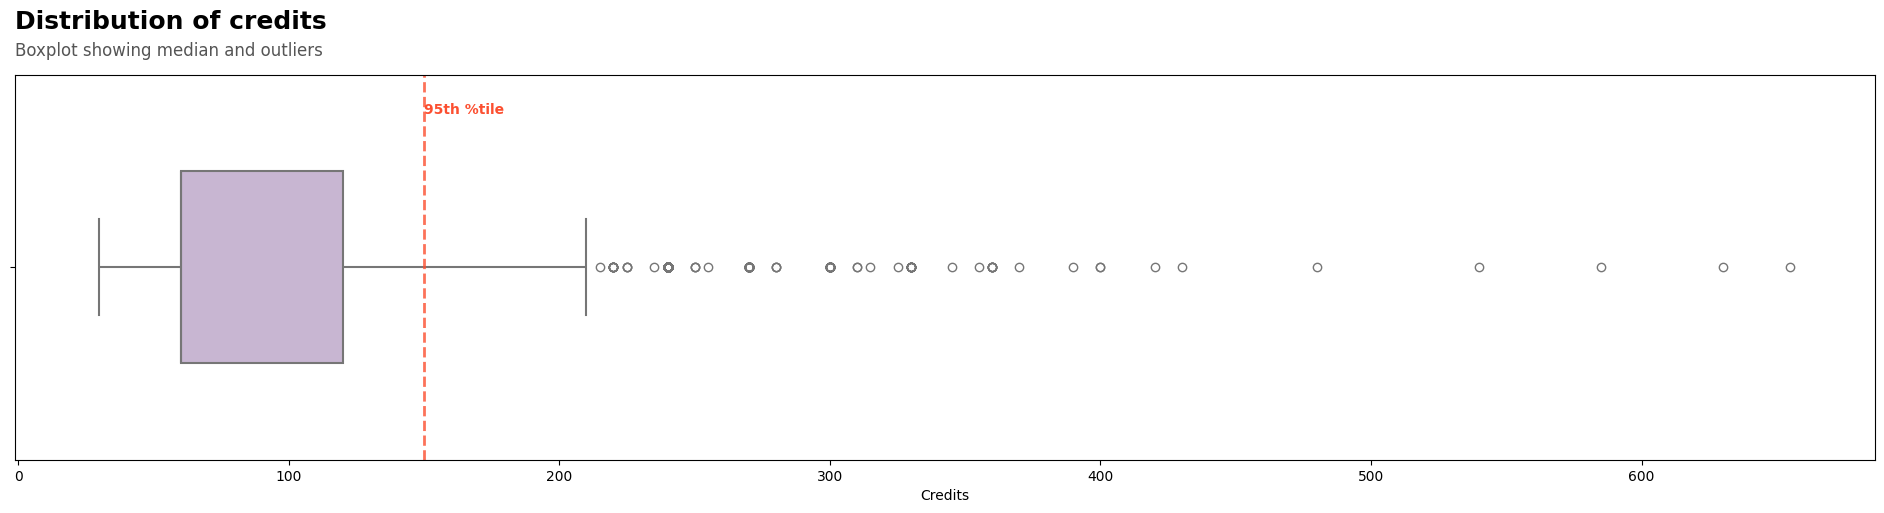

In [37]:
plt.figure(figsize=(24,5))
P.plot_box('credits',data)

In [38]:
data['credits'].skew().round(2)

np.float64(1.88)

- ***There are outliers in credits column, and values are skewed towards right***

**disability**

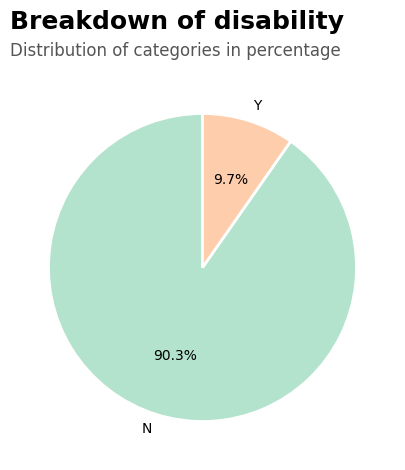

In [39]:
plt.figure(figsize=(24,5))
P.plot_pie('disability',data)

- ***most of the values in `disability` column is `N` - approx `91%`***

**registration**

In [40]:
data['registration'].describe().round(2).reset_index()

index  registration
0  count      32478.00
1   mean        -69.41
2    std         49.25
3    min       -322.00
4    25%       -100.00
5    50%        -57.00
6    75%        -29.00
7    max        167.00

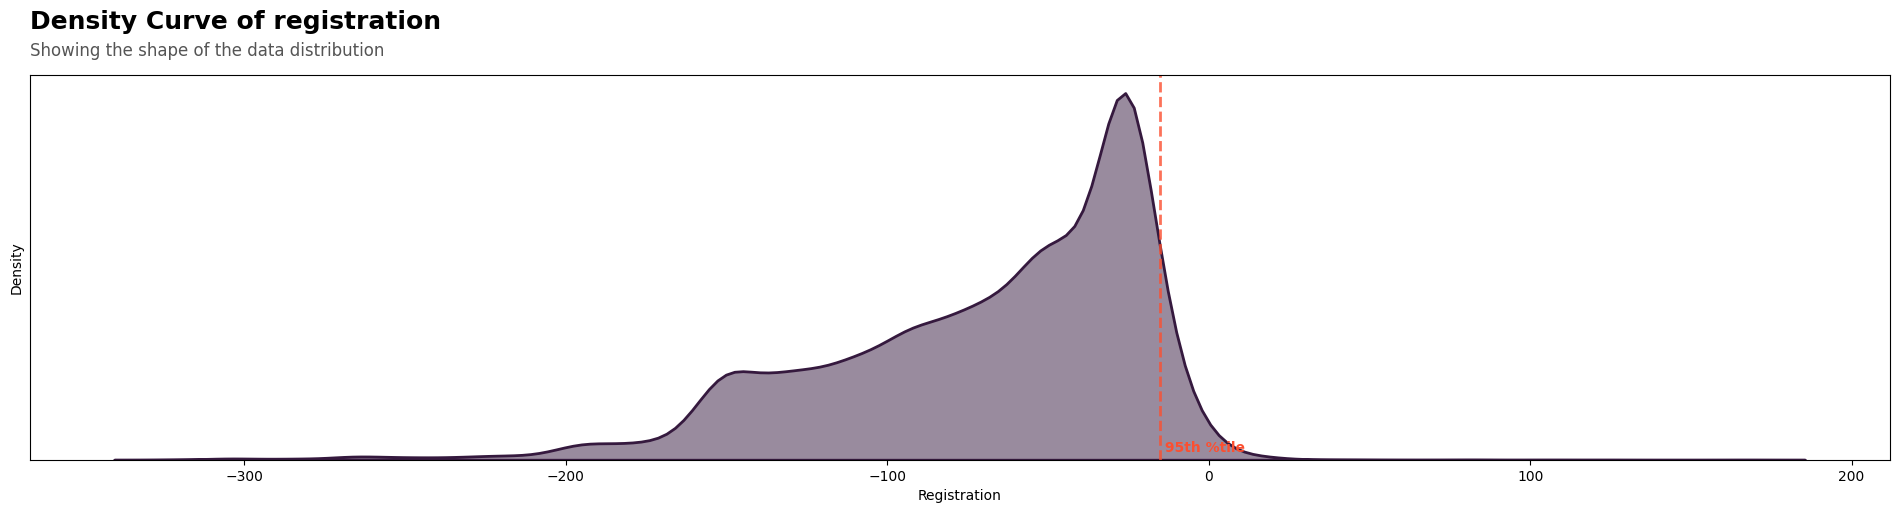

In [41]:
plt.figure(figsize=(24,5))
P.plot_kde('registration',data)

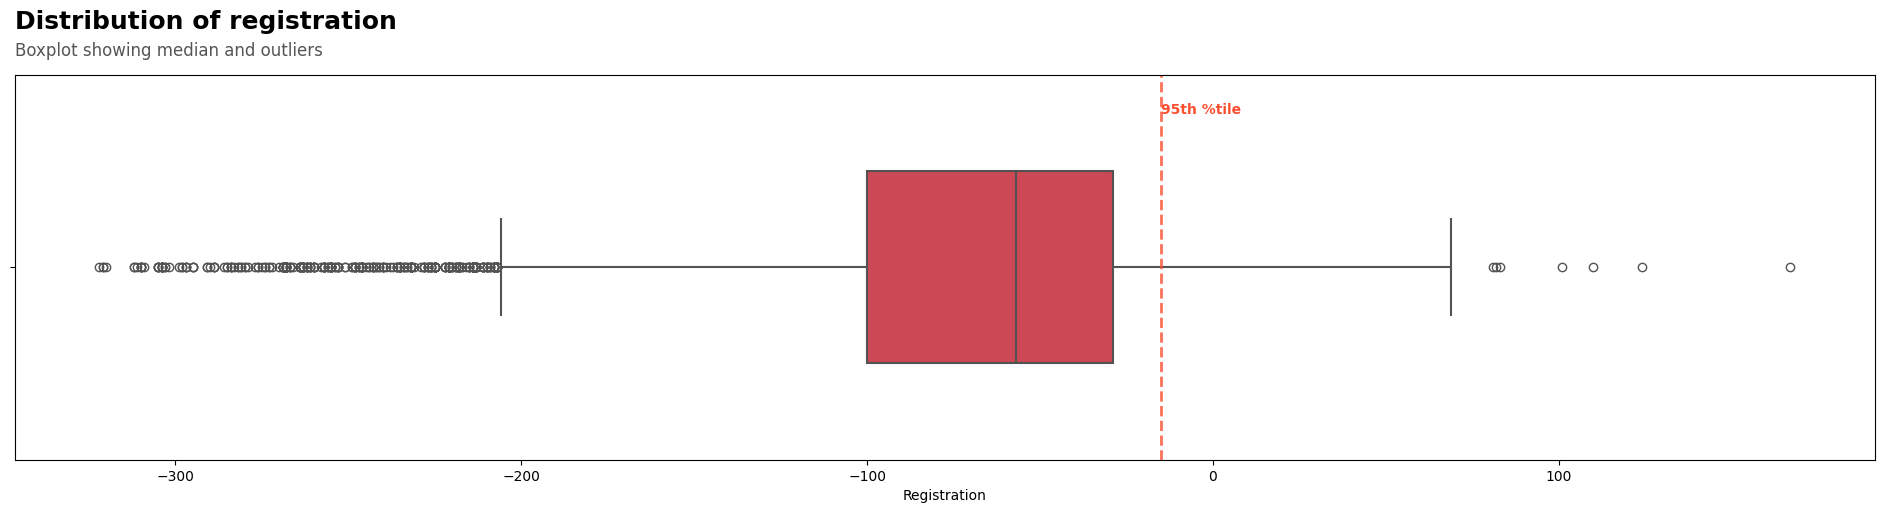

In [42]:
plt.figure(figsize=(24,5))
P.plot_box('registration',data)

In [43]:
data['registration'].skew().round(2)

np.float64(-1.01)

- ***registration column have a little skewness over to the lest, and more outliers to the smaller end***

**unregistration**

In [44]:
data['unregistration'].describe().round(2).reset_index()

index  unregistration
0  count        10041.00
1   mean           50.20
2    std           82.03
3    min         -317.00
4    25%           -1.00
5    50%           28.00
6    75%          109.00
7    max          444.00

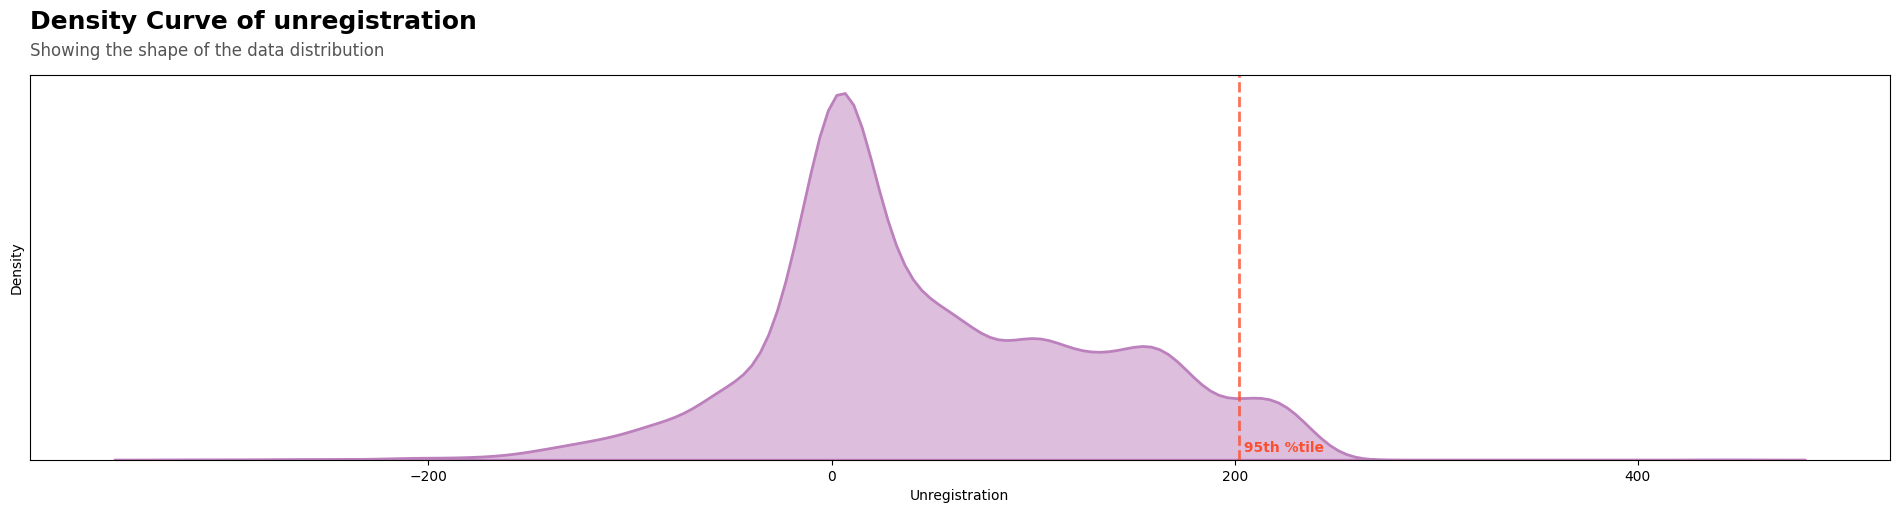

In [45]:
plt.figure(figsize=(24,5))
P.plot_kde('unregistration',data)

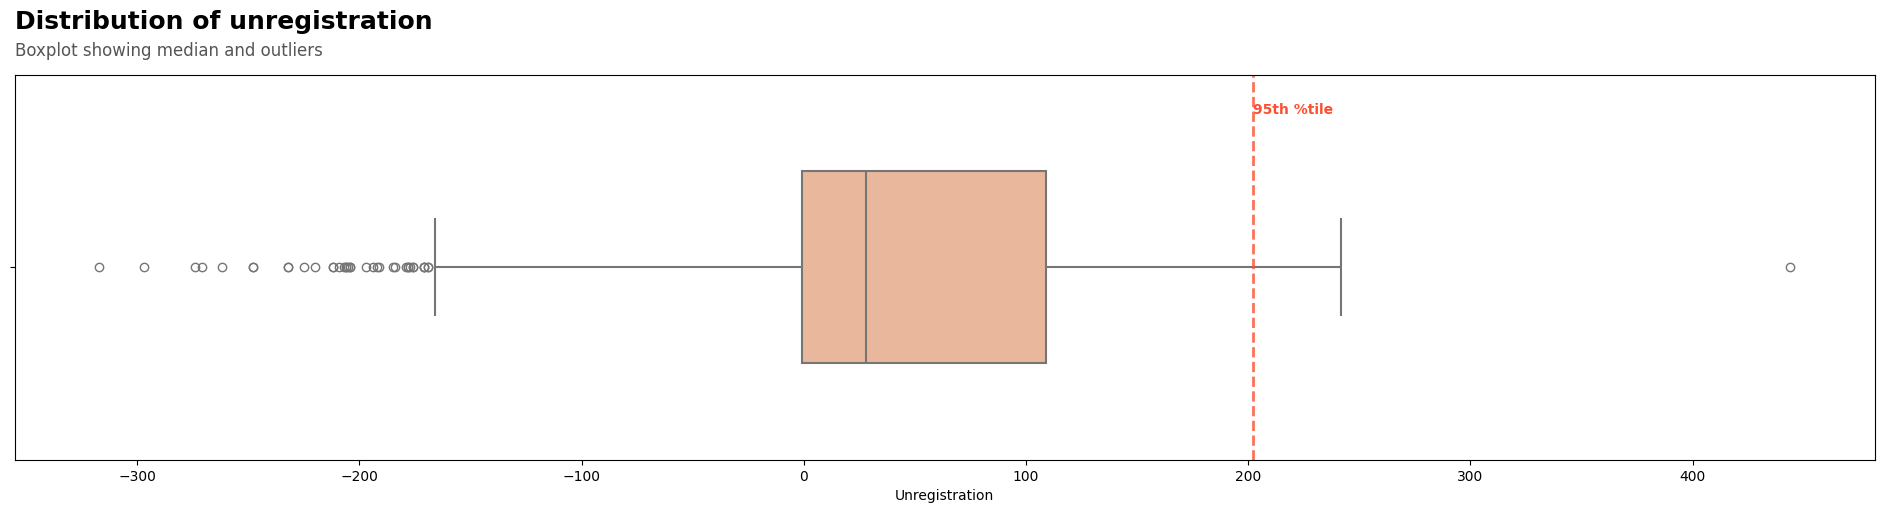

In [46]:
plt.figure(figsize=(24,5))
P.plot_box('unregistration',data)

In [47]:
data['unregistration'].skew().round(2)

np.float64(0.27)

- ***unregistration column have skew towards left, and more outliers to the smaller end***

**vle_used**

In [48]:
data['vle_used'].describe().round(2).reset_index()

index  vle_used
0  count  32478.00
1   mean     60.31
2    std     55.92
3    min      0.00
4    25%     19.00
5    50%     46.00
6    75%     86.00
7    max    413.00

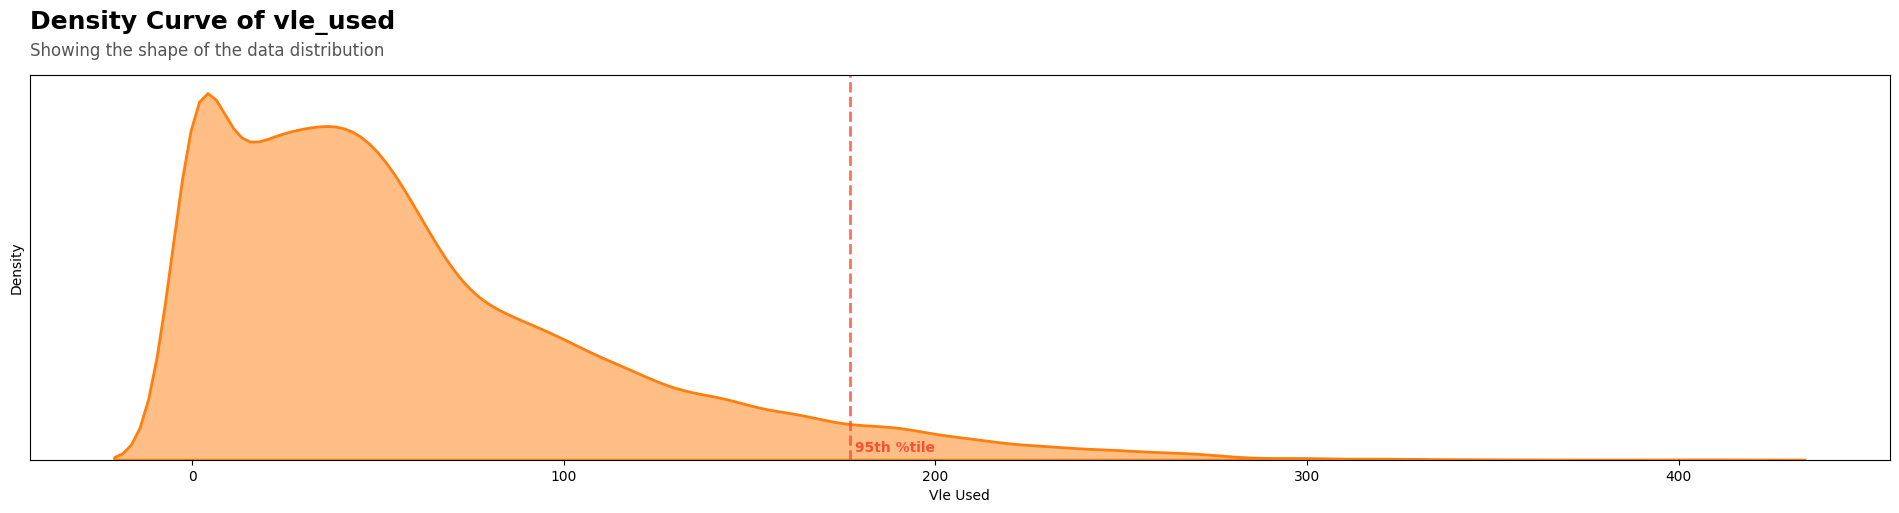

In [49]:
plt.figure(figsize=(24,5))
P.plot_kde('vle_used',data)

In [50]:
data['vle_used'].skew().round(2)

np.float64(1.37)

- ***vle_used have skewness towards right***

**clicks**

In [51]:
data['clicks'].describe().round(2).reset_index()

index    clicks
0  count  32478.00
1   mean   1218.85
2    std   1694.35
3    min      0.00
4    25%    145.00
5    50%    605.00
6    75%   1591.00
7    max  24139.00

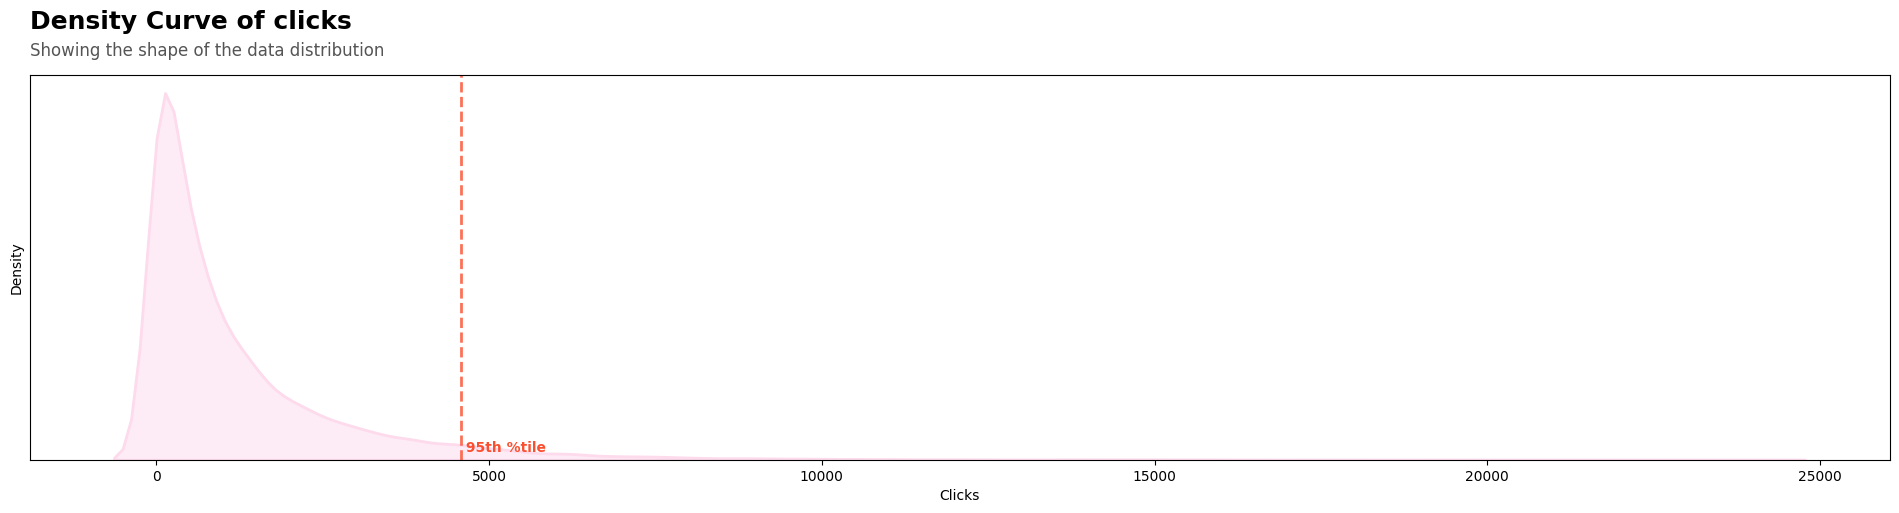

In [52]:
plt.figure(figsize=(24,5))
P.plot_kde('clicks',data)

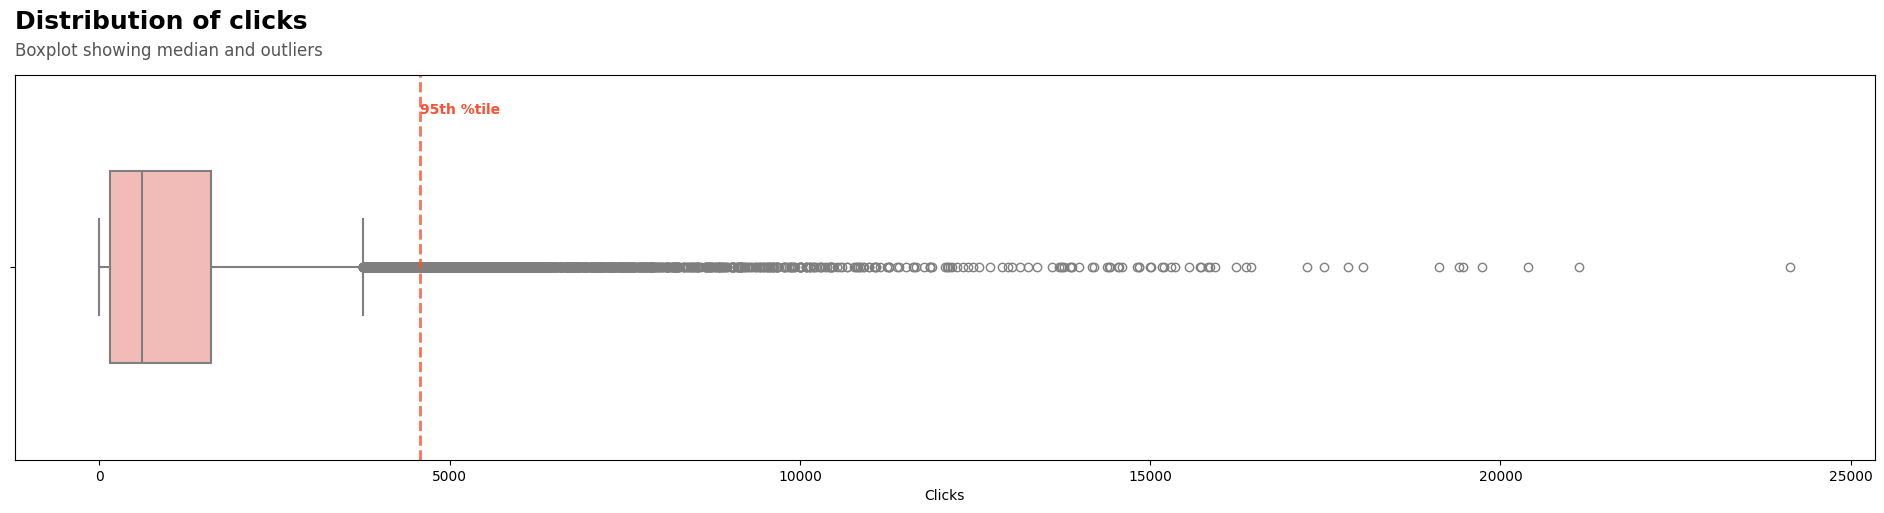

In [53]:
plt.figure(figsize=(24,5))
P.plot_box('clicks',data)

In [54]:
data['clicks'].skew().round(2)

np.float64(3.02)

- ***clicks is skewed towards right, and outliers to the higher end***

**assessments**

In [55]:
data['assessments'].describe().round(2).reset_index()

index  assessments
0  count     32478.00
1   mean         5.35
2    std         4.32
3    min         0.00
4    25%         1.00
5    50%         5.00
6    75%         9.00
7    max        14.00

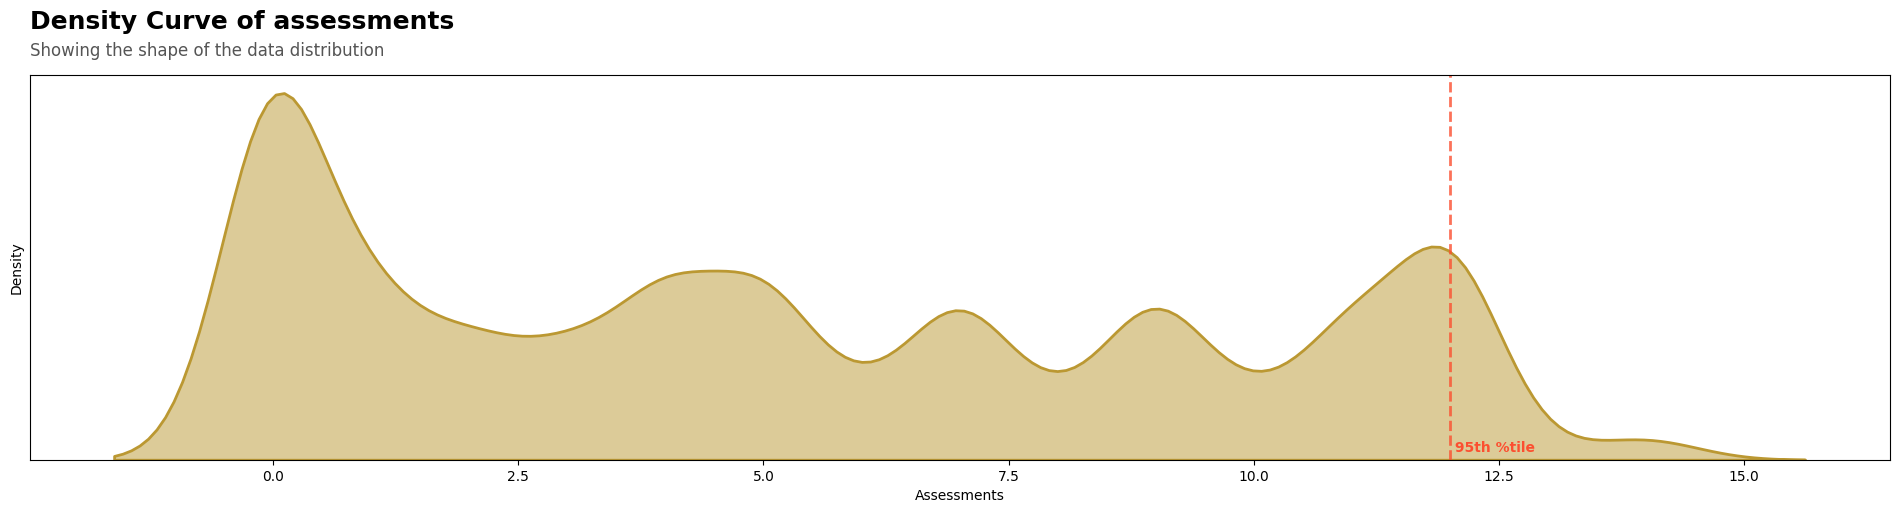

In [56]:
plt.figure(figsize=(24,5))
P.plot_kde('assessments',data)

**attempted_assessment**

In [68]:
data['attempted_assessment'].describe().round(2).reset_index()

index  attempted_assessment
0  count              32478.00
1   mean                  5.29
2    std                  4.34
3    min                  0.00
4    25%                  1.00
5    50%                  5.00
6    75%                  9.00
7    max                 14.00

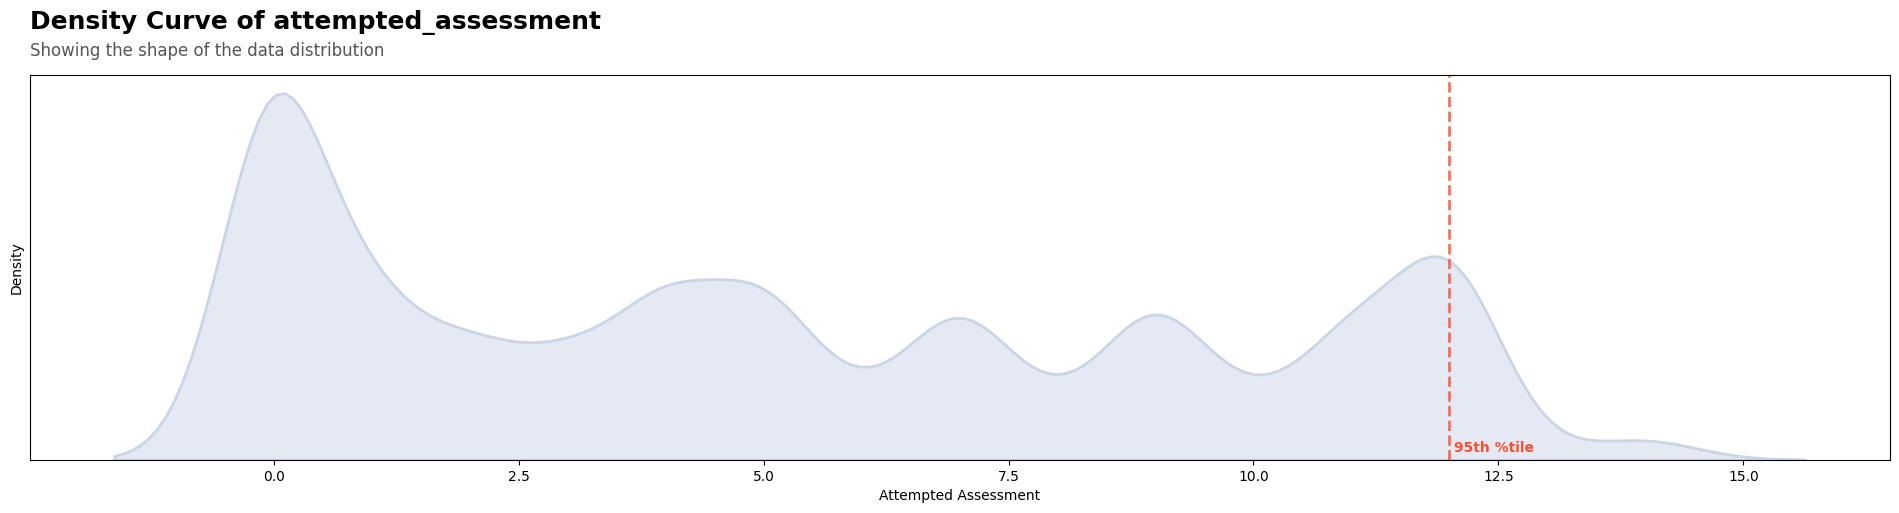

In [69]:
plt.figure(figsize=(24,5))
P.plot_kde('attempted_assessment',data)

**non_attempted_assessment**

In [70]:
data['non_attempted_assessment'].describe().round(2).reset_index()

index  non_attempted_assessment
0  count                  32478.00
1   mean                      0.06
2    std                      0.53
3    min                      0.00
4    25%                      0.00
5    50%                      0.00
6    75%                      0.00
7    max                     12.00

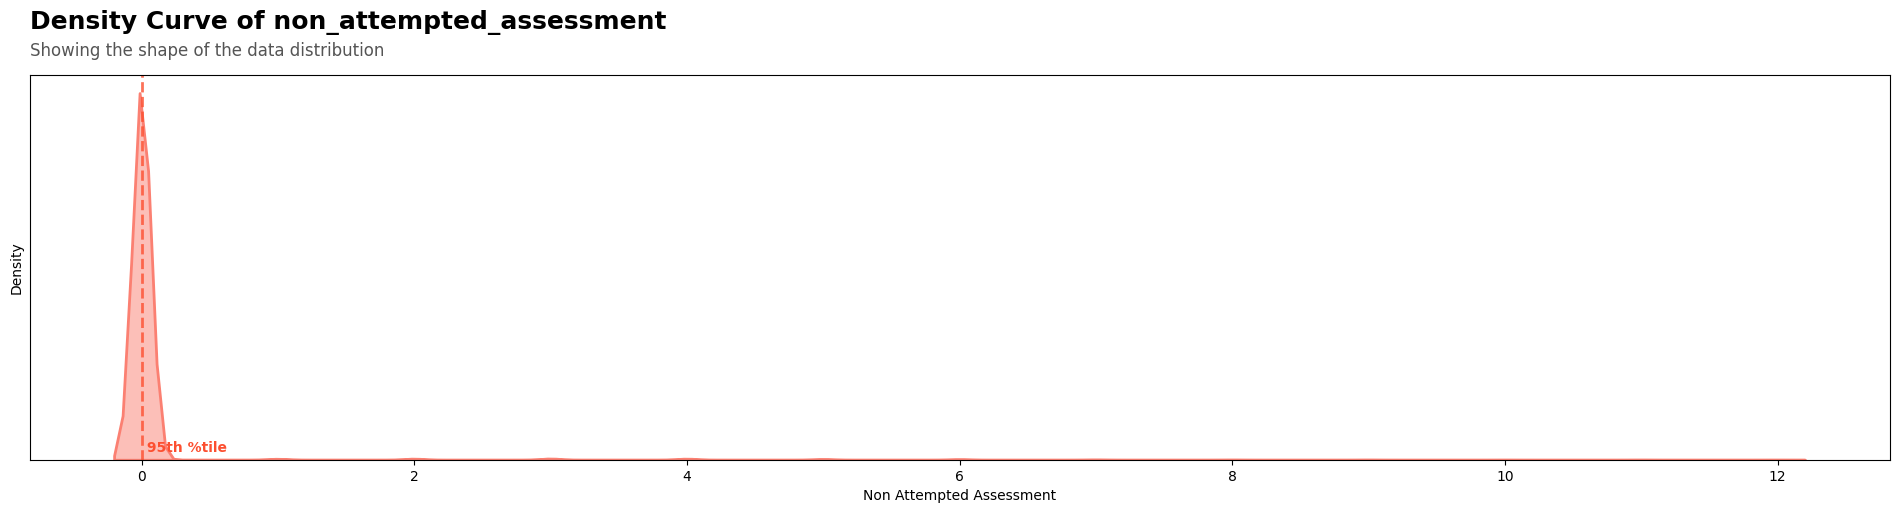

In [71]:
plt.figure(figsize=(24,5))
P.plot_kde('non_attempted_assessment',data)

In [72]:
data['non_attempted_assessment'].value_counts().div(len(data)).mul(100).round(2).reset_index(name = 'percentage')

non_attempted_assessment  percentage
0                          0       98.39
1                          3        0.33
2                          2        0.29
3                          4        0.29
4                          1        0.26
5                          5        0.17
6                          6        0.14
7                          7        0.05
8                          9        0.02
9                          8        0.02
10                        11        0.02
11                        10        0.01
12                        12        0.01

In [75]:
bins = [-1, 0, 100]
labels = ['NONE', 'ANY']
data['non_attempted_assessment'] = pd.cut(data['non_attempted_assessment'], bins=bins, labels=labels)

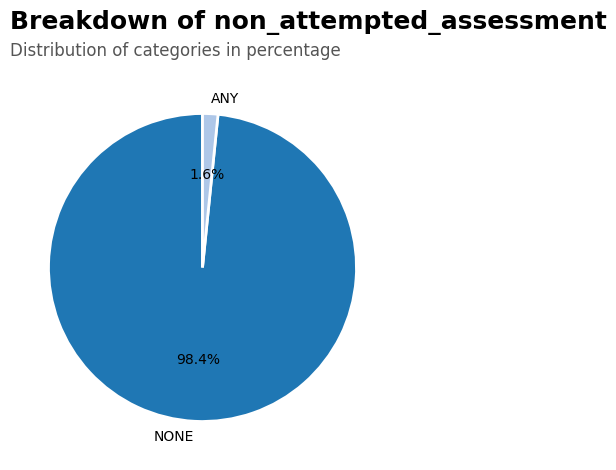

In [76]:
plt.figure(figsize=(24,5))
P.plot_pie('non_attempted_assessment',data)

**score**

In [57]:
data['score'].describe().round(2).reset_index()

index     score
0  count  32478.00
1   mean     57.81
2    std     32.84
3    min      0.00
4    25%     43.50
5    50%     70.67
6    75%     82.43
7    max    100.00

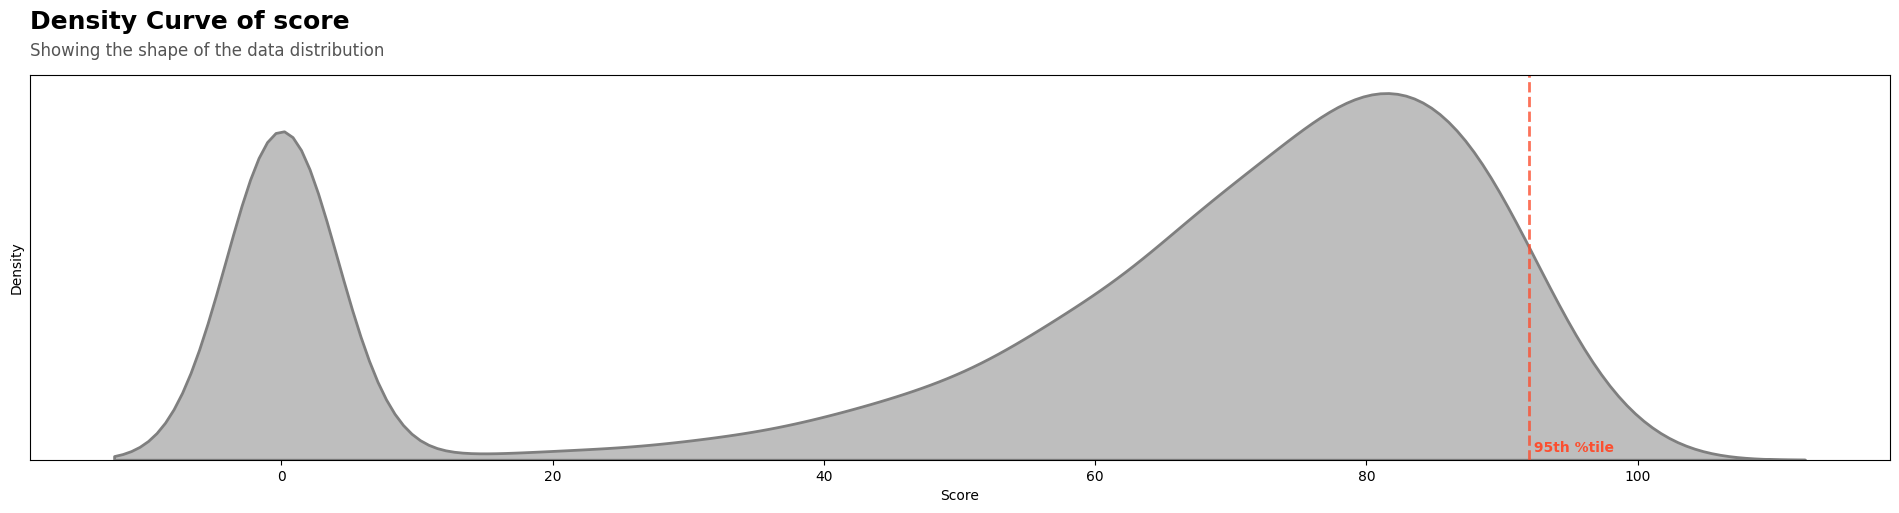

In [58]:
plt.figure(figsize=(24,5))
P.plot_kde('score',data)

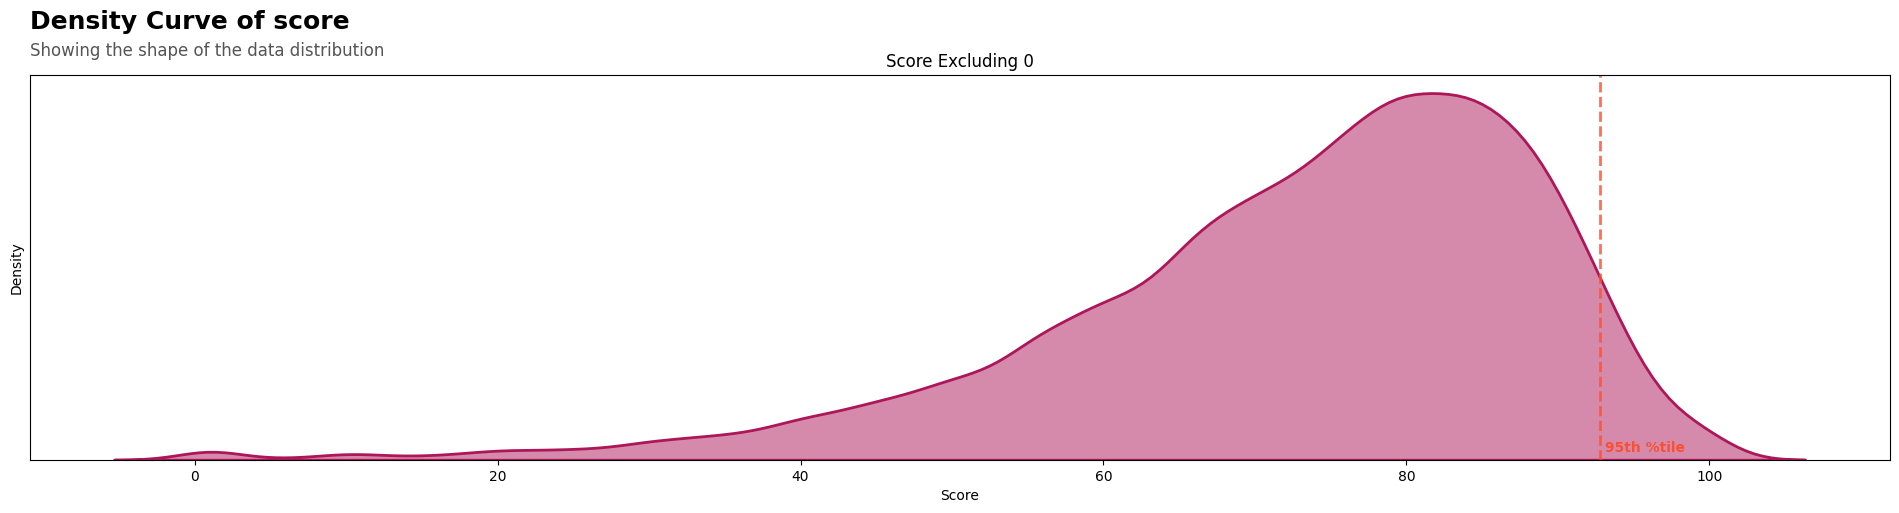

In [59]:
plt.figure(figsize=(24,5))
P.plot_kde('score',data[data['score'] != 0])
plt.title('Score Excluding 0')
plt.show()

**clicks_per_vle**

In [60]:
data['clicks_per_vle'].describe().round(2).reset_index()

index  clicks_per_vle
0  count        32478.00
1   mean           15.21
2    std           14.79
3    min            0.00
4    25%            6.12
5    50%           12.02
6    75%           20.48
7    max          314.00

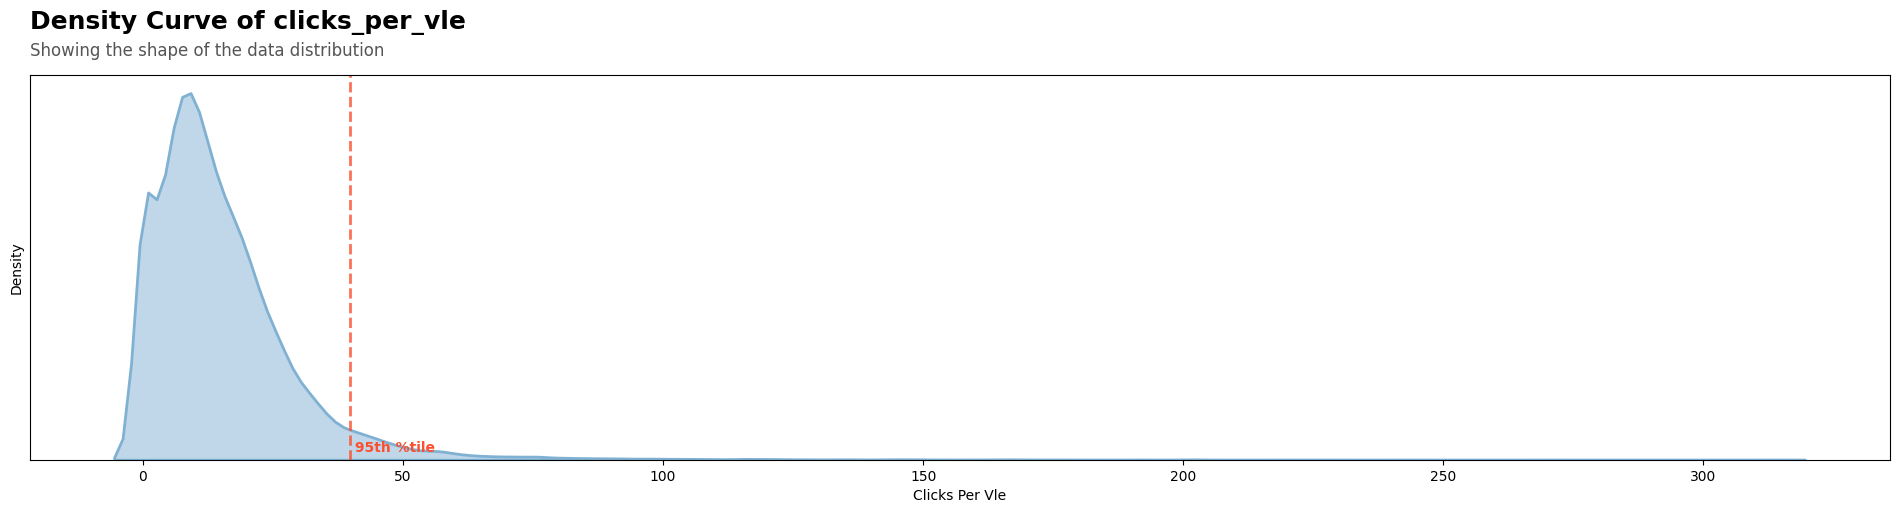

In [61]:
plt.figure(figsize=(24,5))
P.plot_kde('clicks_per_vle',data)

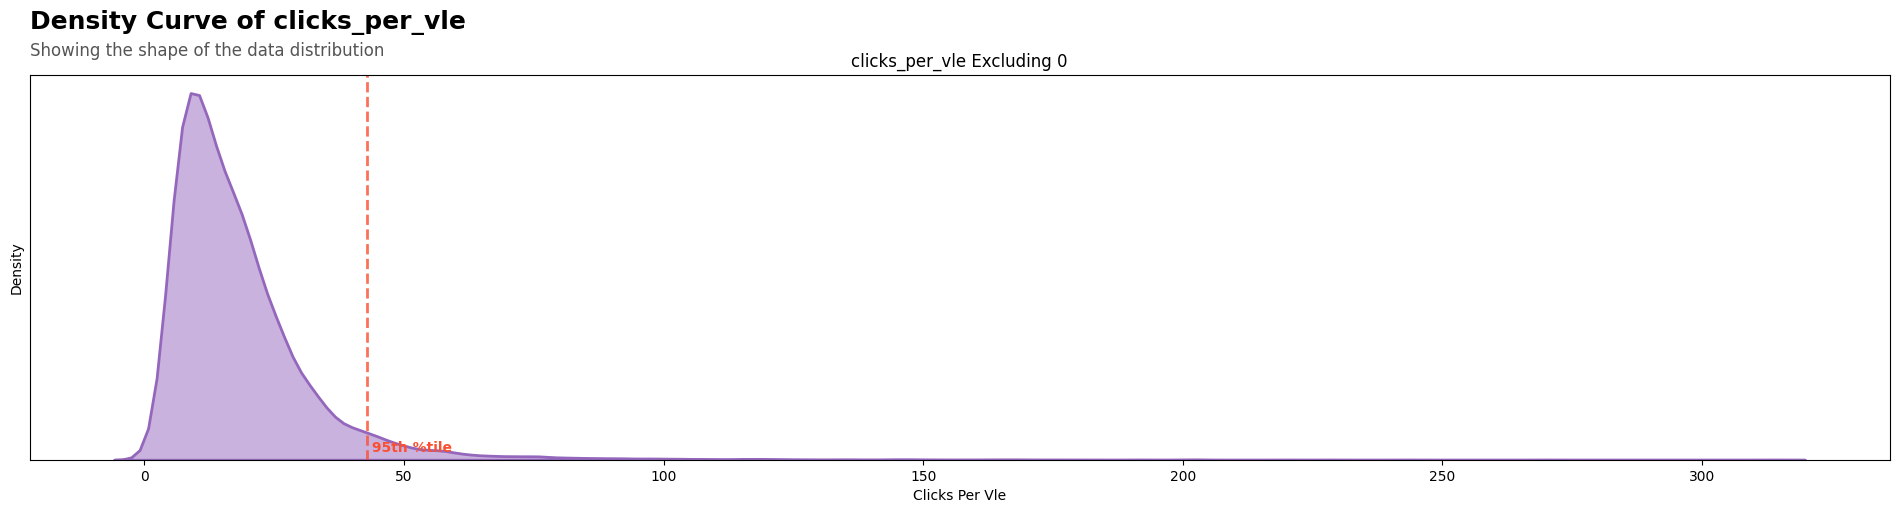

In [62]:
plt.figure(figsize=(24,5))
P.plot_kde('clicks_per_vle',data[data['score'] != 0])
plt.title('clicks_per_vle Excluding 0')
plt.show()

**attempt_pct**

In [63]:
data['attempt_pct'].describe().round(2).reset_index()

index  attempt_pct
0  count     32478.00
1   mean        78.30
2    std        41.03
3    min         0.00
4    25%       100.00
5    50%       100.00
6    75%       100.00
7    max       100.00

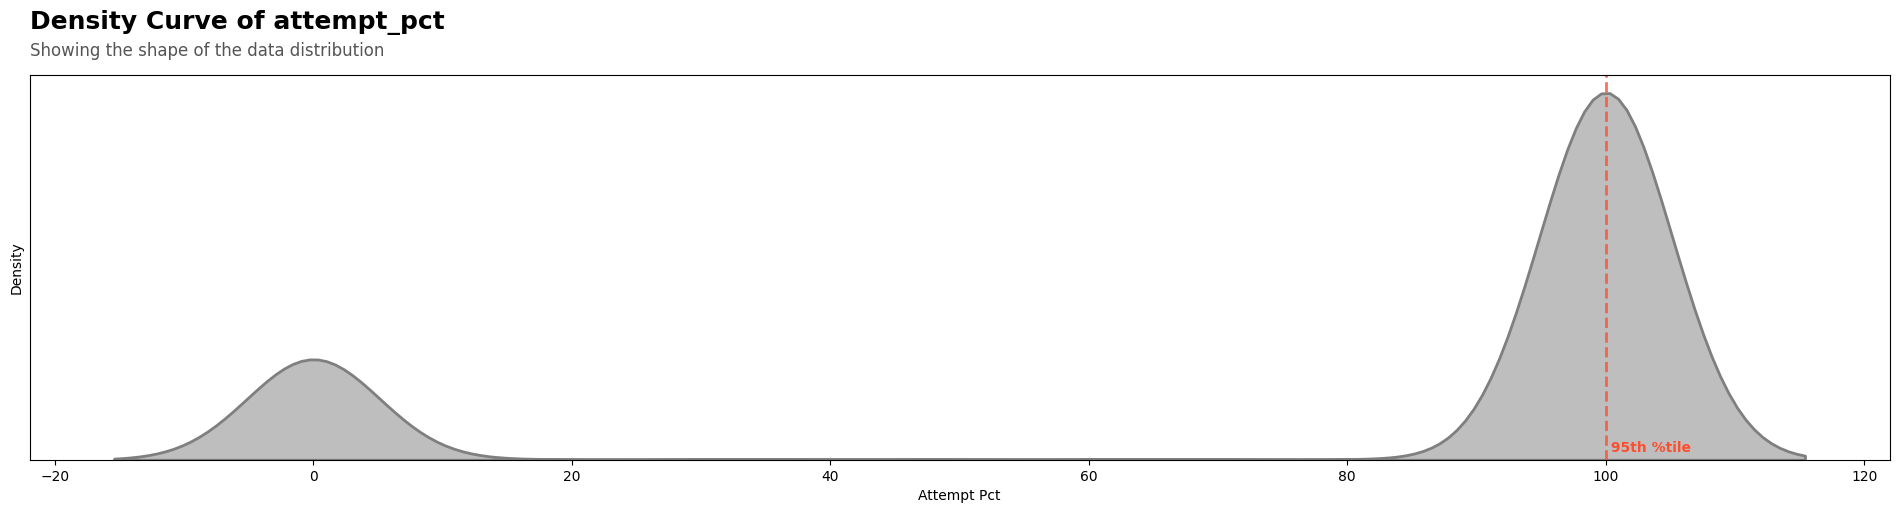

In [64]:
plt.figure(figsize=(24,5))
P.plot_kde('attempt_pct',data)

In [65]:
data['attempt_pct'].value_counts().div(len(data)).mul(100).round(2).reset_index(name = 'percentage')

attempt_pct  percentage
0        100.00       77.88
1          0.00       21.31
2         66.67        0.10
3         33.33        0.08
4         50.00        0.08
5         14.29        0.04
6         75.00        0.03
7         28.57        0.03
8         42.86        0.03
9         16.67        0.03
10        60.00        0.03
11        20.00        0.02
12        25.00        0.02
13        80.00        0.02
14        57.14        0.02
15        85.71        0.02
16        63.64        0.02
17        83.33        0.02
18        40.00        0.02
19        90.91        0.02
20        45.45        0.02
21        81.82        0.02
22        71.43        0.01
23        36.36        0.01
24        30.00        0.01
25        88.89        0.01
26        58.33        0.01
27        72.73        0.01
28        22.22        0.01
29        54.55        0.01
30        37.50        0.01
31        12.50        0.01
32        41.67        0.01
33        84.62        0.01
34        62.50        0.01
35        18.18        0.01
36        87.50        0.00
37        90.00        0.00
38        70.00        0.00
39         9.09        0.00
40        10.00        0.00
41        77.78        0.00
42        78.57        0.00
43        11.11        0.00
44        44.44        0.00
45        91.67        0.00

In [66]:
bins = [-1, 99, 100]
labels = ['NONE', 'ALL']
data['attempt_pct'] = pd.cut(data['attempt_pct'], bins=bins, labels=labels)

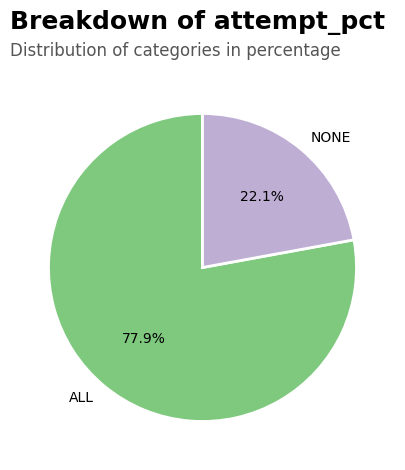

In [75]:
plt.figure(figsize=(24,5))
P.plot_pie('attempt_pct',data)

**final_result**

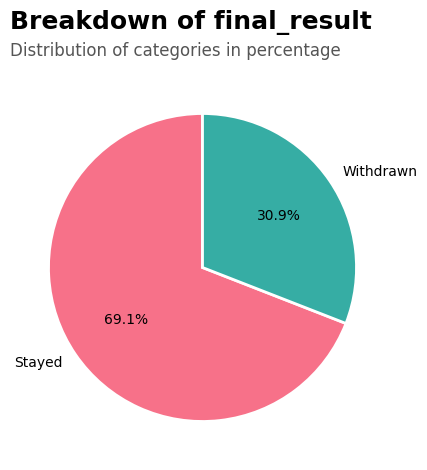

In [77]:
plt.figure(figsize=(24,5))
P.plot_pie('final_result',data)

### **Bivariate Analysis with `final_result` column**

In [79]:
cat_cols = data.select_dtypes(include='object').columns.values.tolist()

In [80]:
num_cols = data.select_dtypes(include='number').columns.values.tolist()

***CATEGORICAL COLUMNS WITH `final_result` COLUMN***

**module**

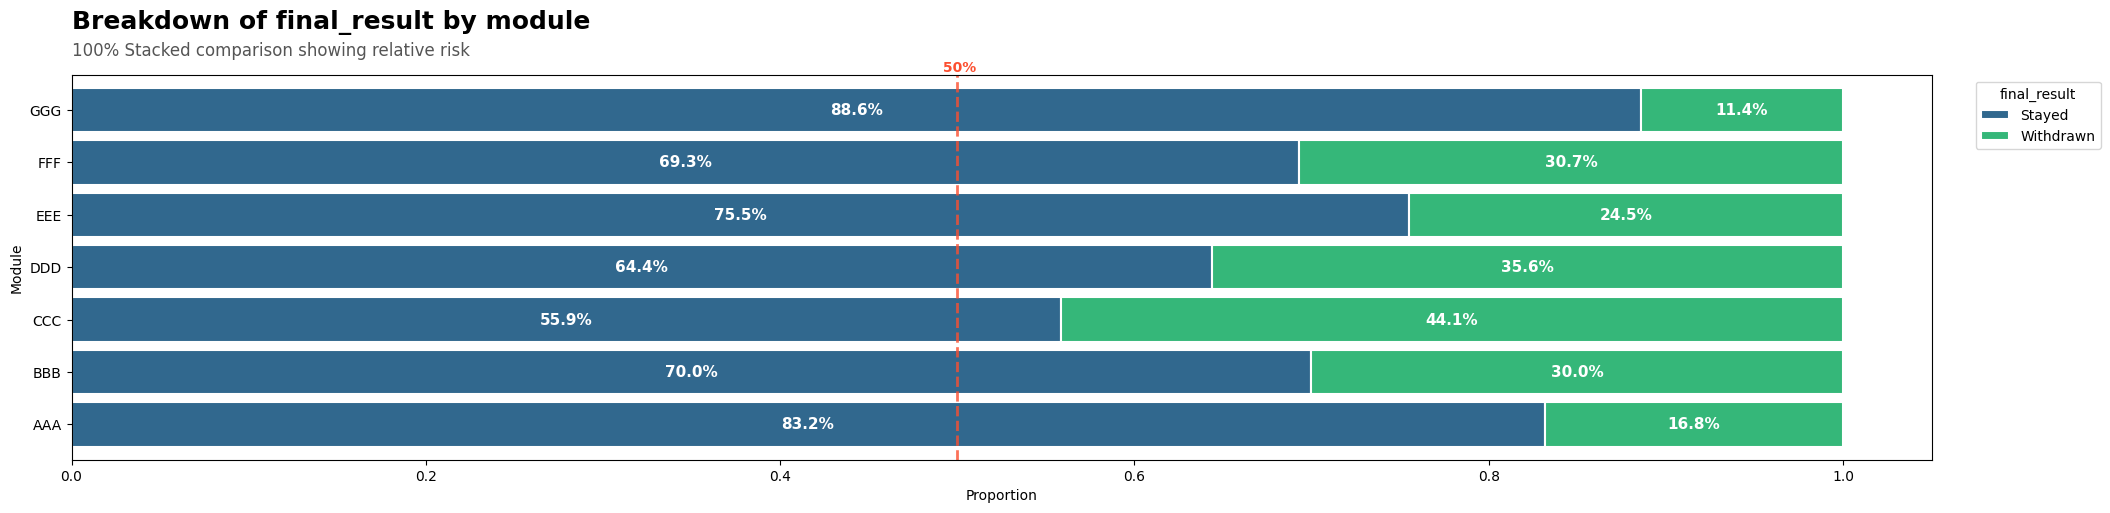

In [83]:
ct = pd.crosstab(data['module'],data['final_result'],normalize='index')
plt.figure(figsize=(24,5))
P.plot_stacked(ct,orient='h')

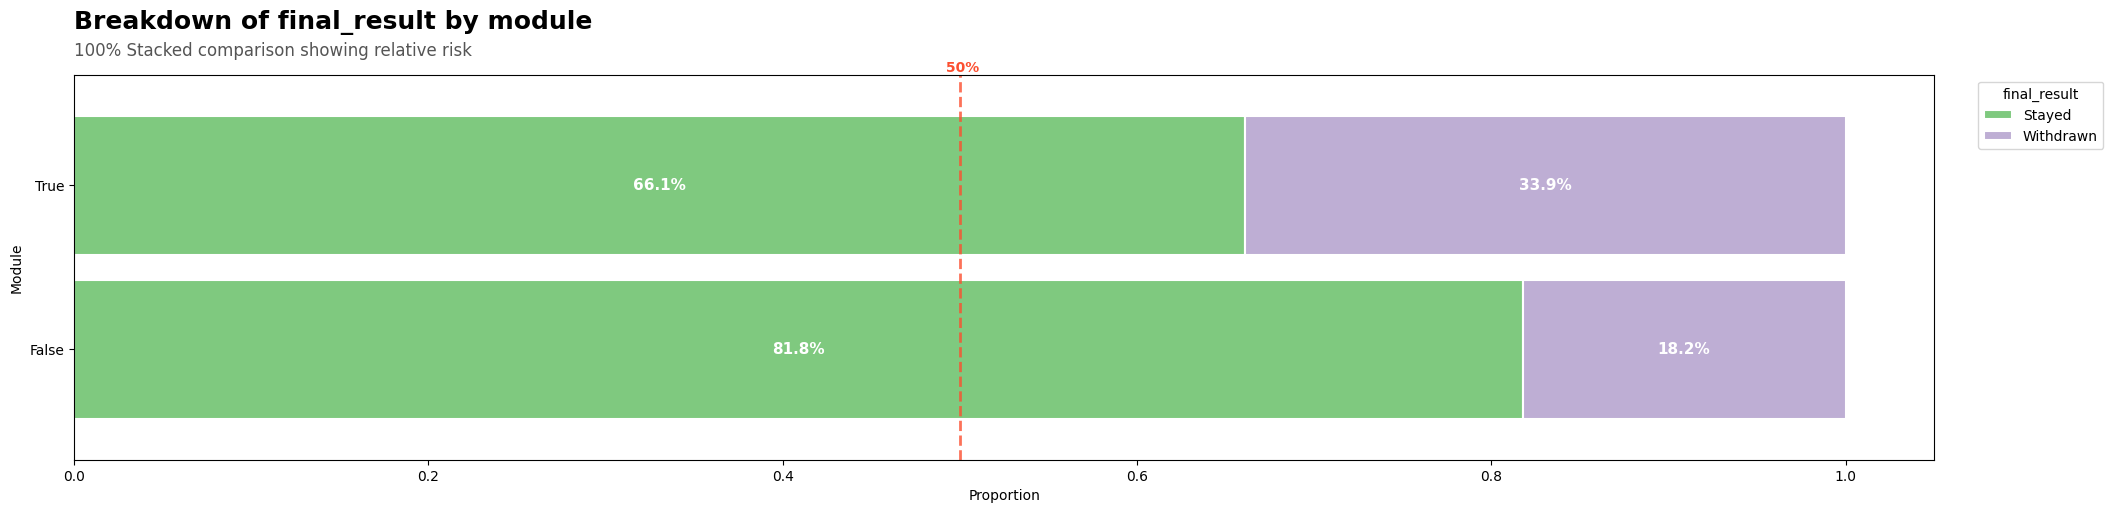

In [85]:
module_mask = (data['module']=='CCC') | (data['module']=='DDD') | (data['module']=='BBB')|(data['module']=='FFF')
ct = pd.crosstab(module_mask,data['final_result'],normalize='index')
plt.figure(figsize=(24,5))
P.plot_stacked(ct,orient='h')

In [87]:
ct = pd.crosstab(module_mask,data['final_result'])
S.test_association(ct)


=== Categorical Association Test ===
Test Used:      Chi-Square Test
P-Value:        0.00000
Verdict:        Significant Dependence ✅
Strength:       Cramer's V = 0.124 (Moderate)


***
- ***by visuals we saw that `module BBB,CCC,DDD,FFF have more withdrawn candidates`, after doing statistical test, we can validate this assumption with `moderate strength`***
***

**presentation**

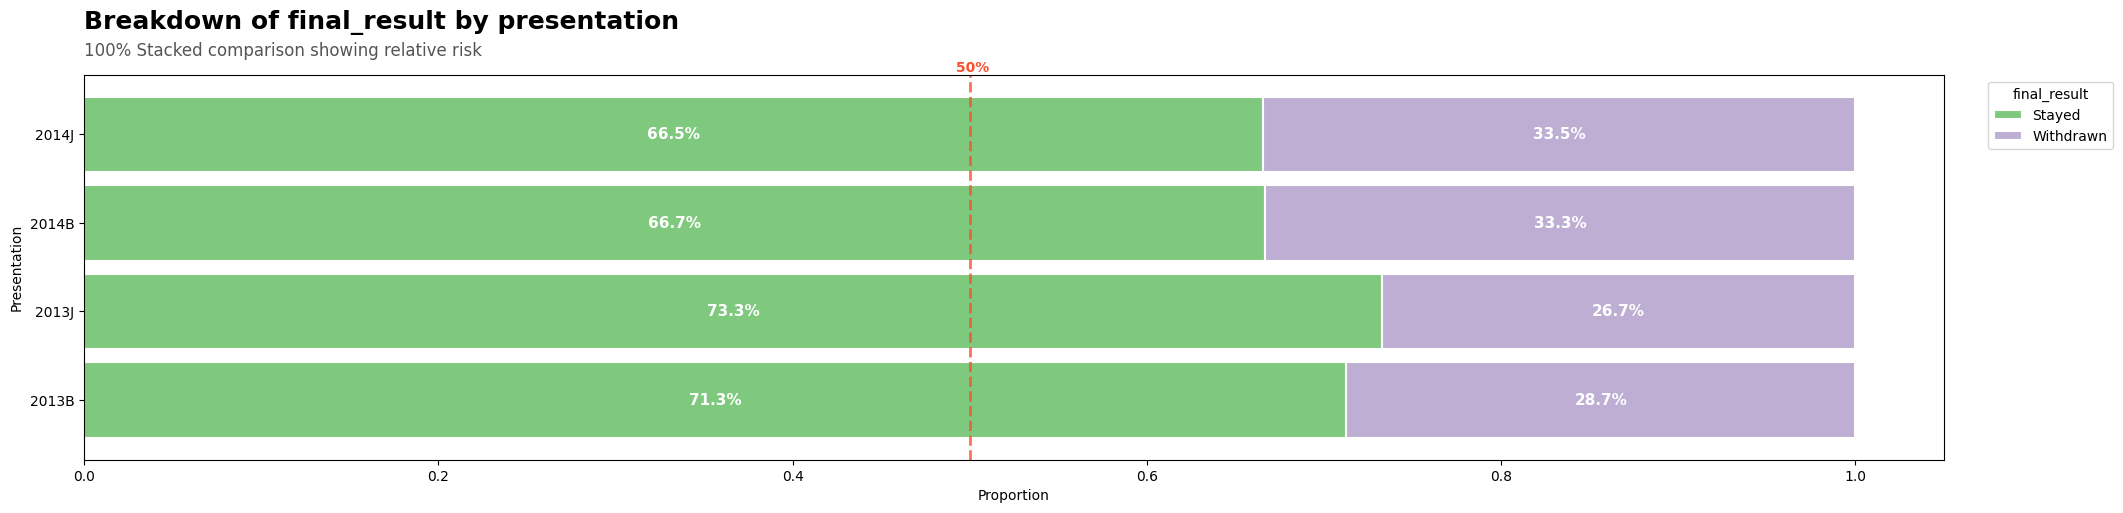

In [89]:
ct = pd.crosstab(data['presentation'],data['final_result'],normalize='index')
plt.figure(figsize=(24,5))
P.plot_stacked(ct,orient='h')

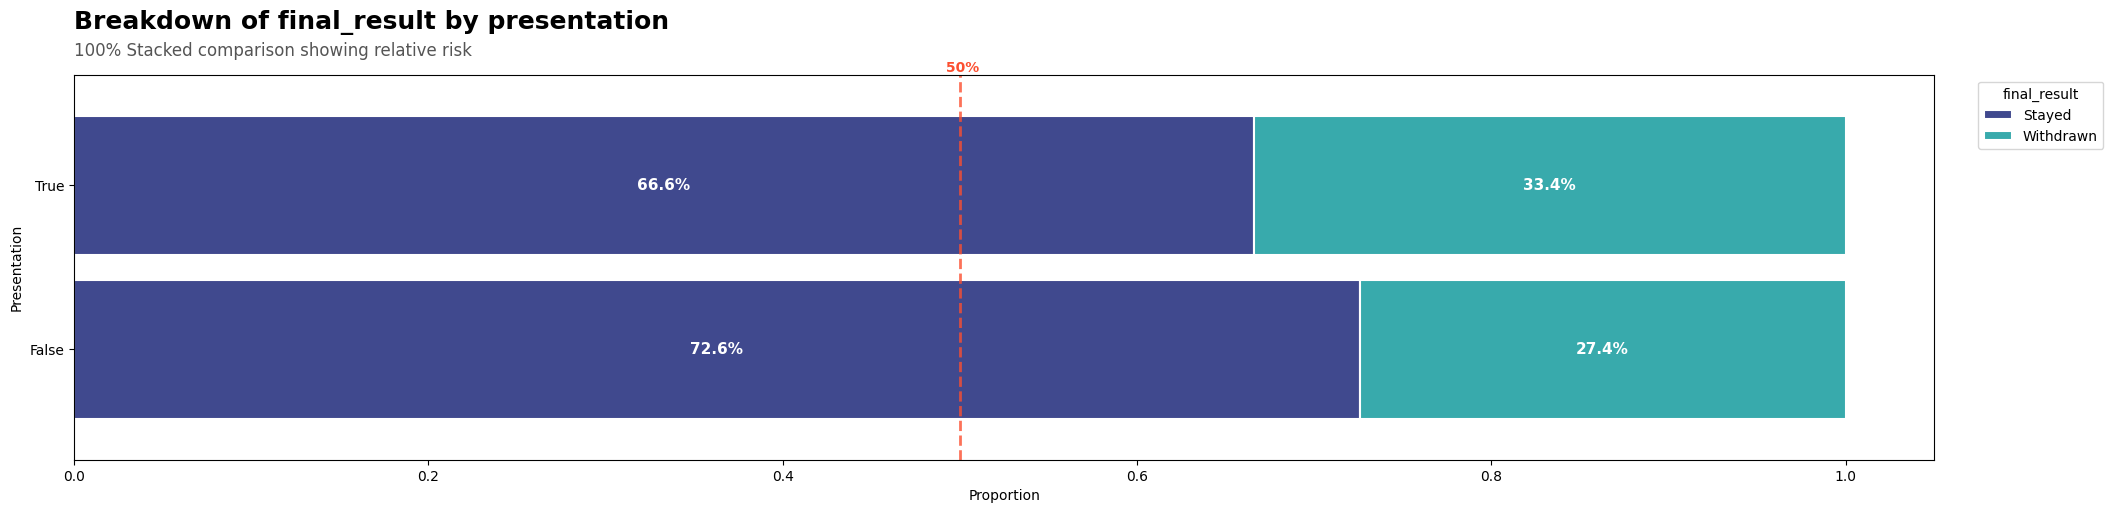

In [92]:
presentation_mask = (data['presentation']=='2014J') | (data['presentation']=='2014B')
ct = pd.crosstab(presentation_mask,data['final_result'],normalize='index')
plt.figure(figsize=(24,5))
P.plot_stacked(ct,orient='h')

In [93]:
ct = pd.crosstab(presentation_mask,data['final_result'])
S.test_association(ct)


=== Categorical Association Test ===
Test Used:      Chi-Square Test
P-Value:        0.00000
Verdict:        Significant Dependence ✅
Strength:       Cramer's V = 0.064 (Weak)



- ***by visuals we saw that 2014B and 2014J have slighly more in final result = withdrawn, after doing statistical test, we get a weak relationship***

**gender**

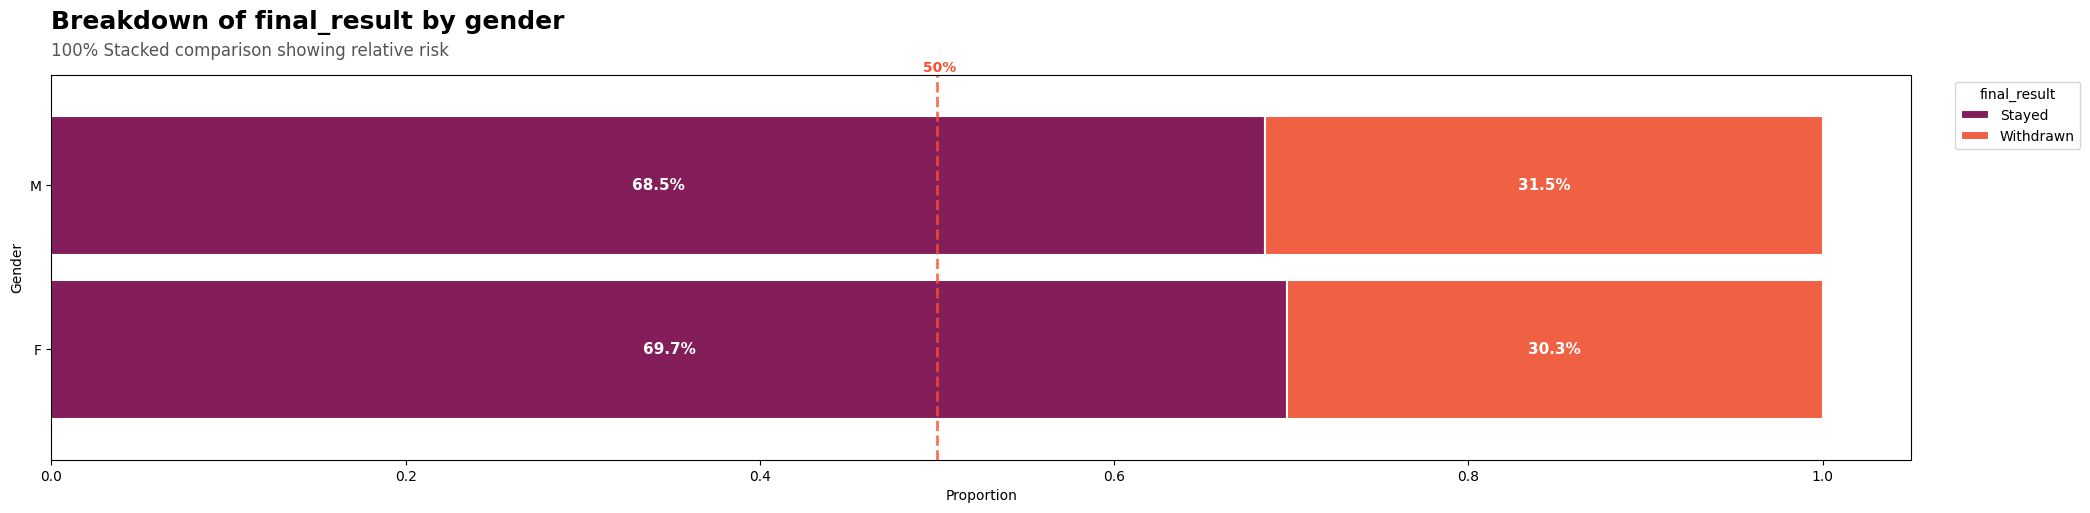

In [94]:
ct = pd.crosstab(data['gender'],data['final_result'],normalize='index')
plt.figure(figsize=(24,5))
P.plot_stacked(ct,orient='h')

- ***by visuals we saw both gender have almost equal withdrawns***

**student_region**

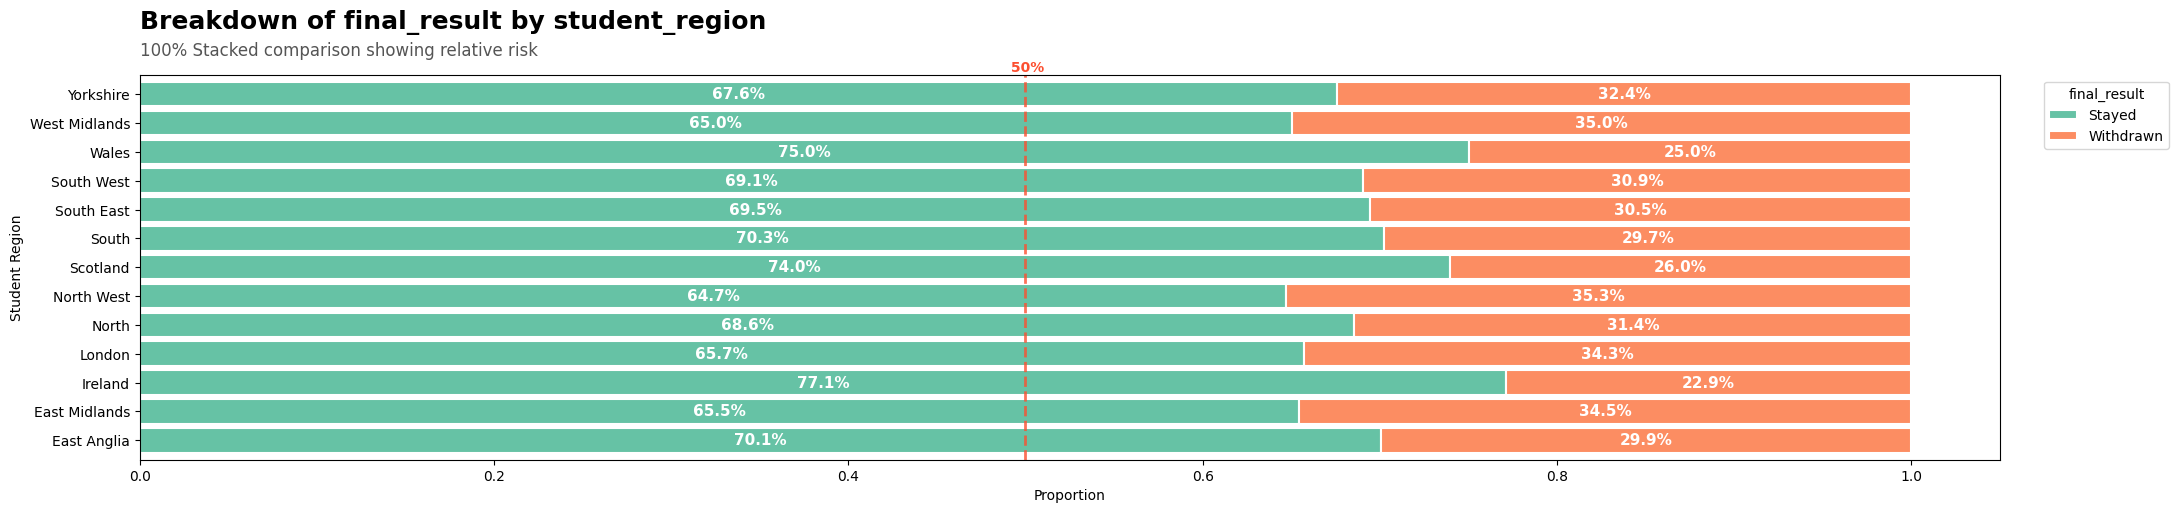

In [95]:
ct = pd.crosstab(data['student_region'],data['final_result'],normalize='index')
plt.figure(figsize=(24,5))
P.plot_stacked(ct,orient='h')

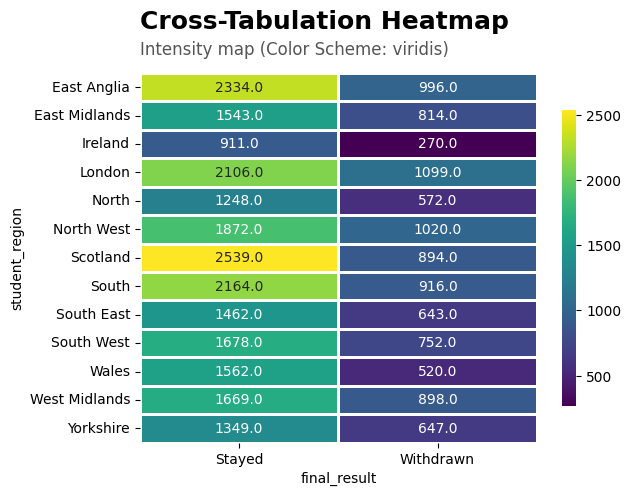

In [99]:
ct = pd.crosstab(data['student_region'],data['final_result'])
P.plot_heatmap(ct)

In [96]:
data['student_region'].unique()

array(['East Anglia', 'Scotland', 'North West', 'South East',
       'West Midlands', 'Wales', 'North', 'South', 'Ireland',
       'South West', 'East Midlands', 'Yorkshire', 'London'], dtype=object)

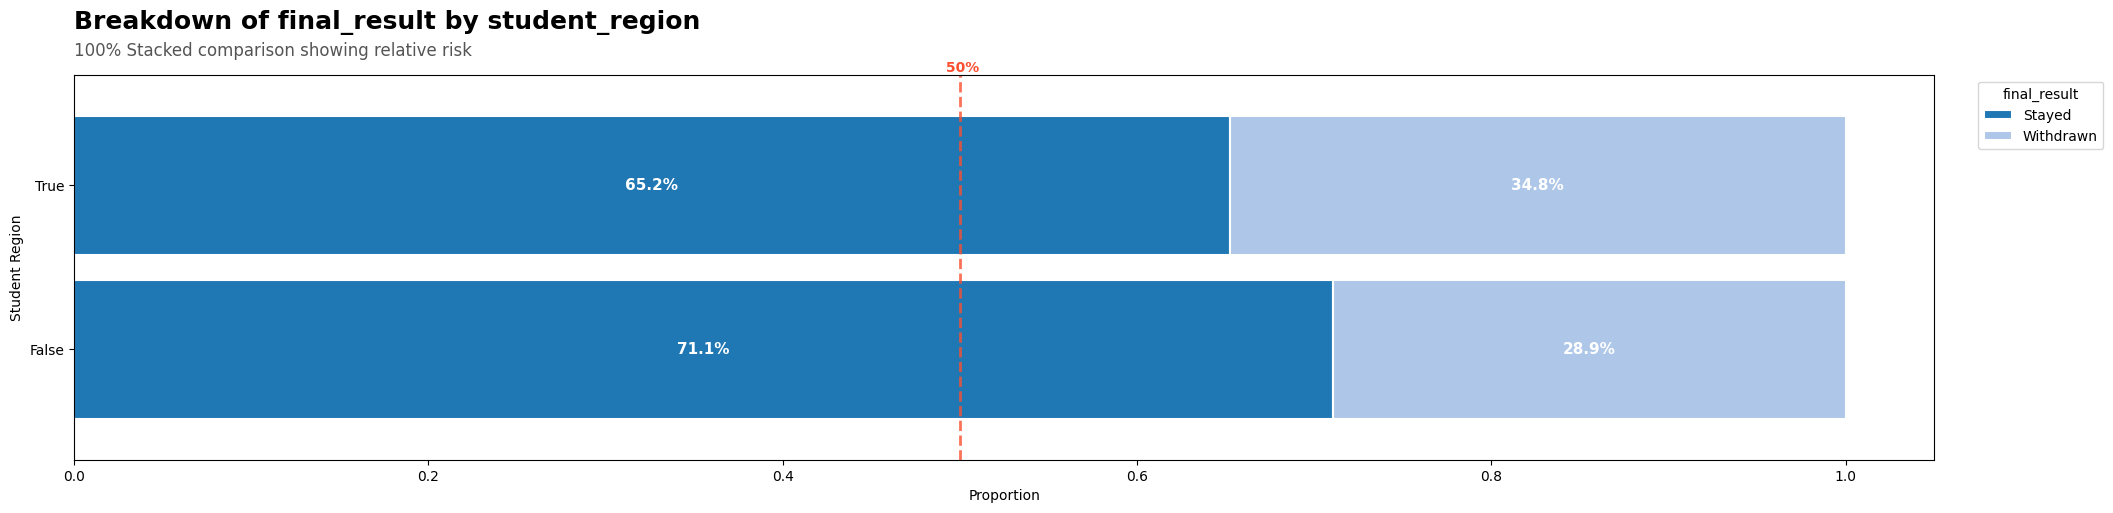

In [103]:
region_mask = (data['student_region']=='West Midlands') | (data['student_region']=='North West') | (data['student_region']=='London') | (data['student_region']=='East Midlands')
ct = pd.crosstab(region_mask,data['final_result'],normalize='index')
plt.figure(figsize=(24,5))
P.plot_stacked(ct,orient='h')

In [98]:
ct = pd.crosstab(data['student_region'],data['final_result'])
S.test_association(ct)


=== Categorical Association Test ===
Test Used:      Chi-Square Test
P-Value:        0.00000
Verdict:        Significant Dependence ✅
Strength:       Cramer's V = 0.077 (Weak)


- ***by visuals we saw that some of the region have higher withdrawns,but statistical test says columns have weak association***

**qualification**

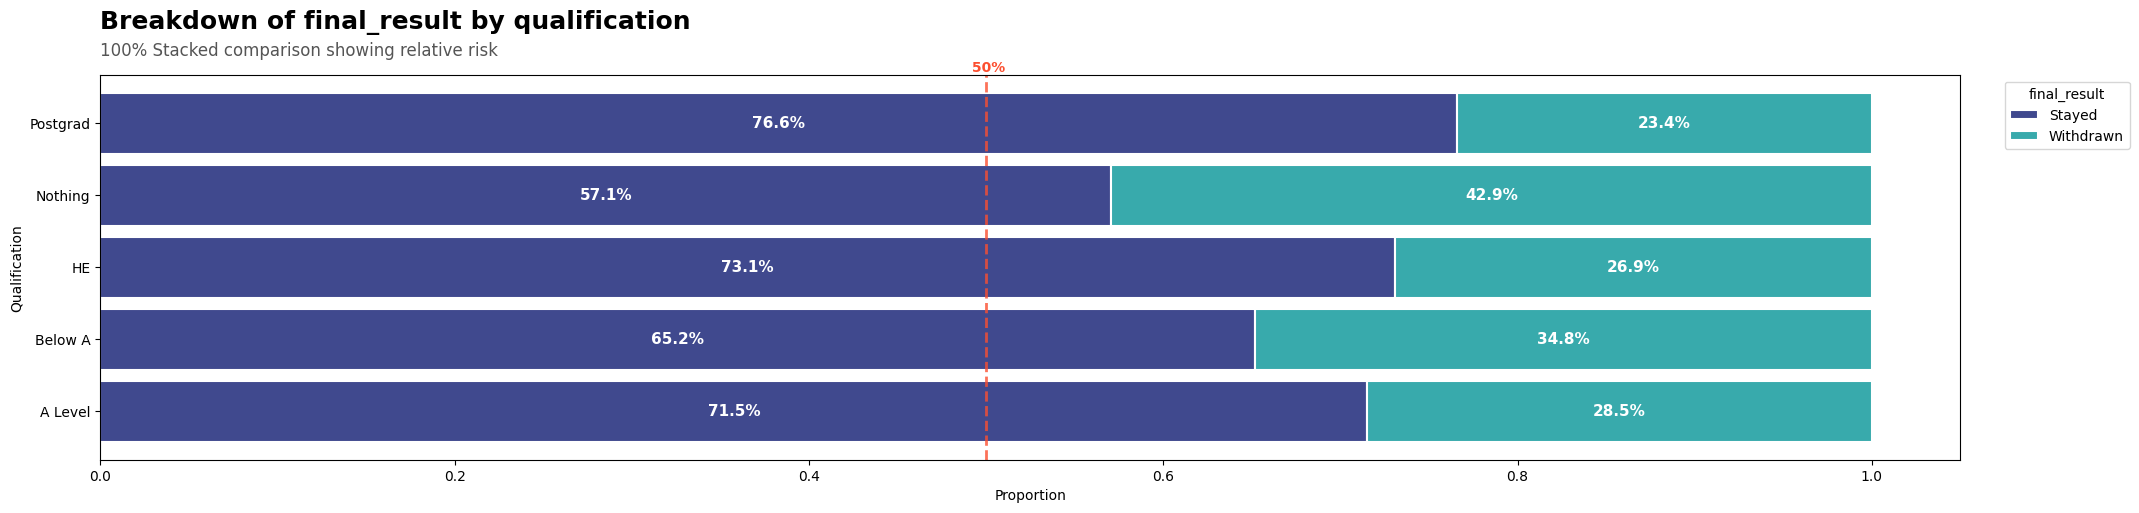

In [102]:
ct = pd.crosstab(data['qualification'],data['final_result'],normalize='index')
plt.figure(figsize=(24,5))
P.plot_stacked(ct,orient='h')

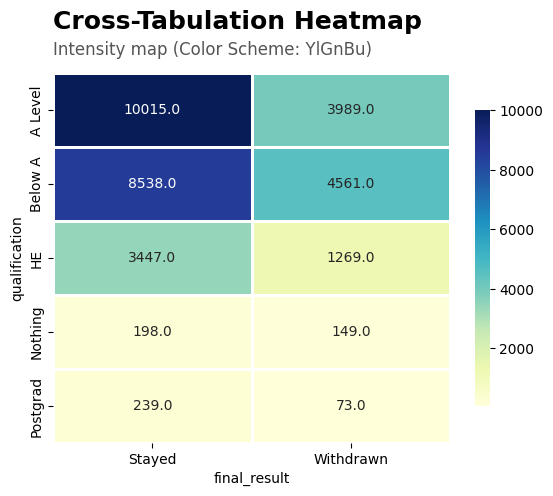

In [109]:
ct = pd.crosstab(data['qualification'],data['final_result'])
P.plot_heatmap(ct)

In [105]:
data['qualification'].unique()

array(['HE', 'A Level', 'Below A', 'Postgrad', 'Nothing'], dtype=object)

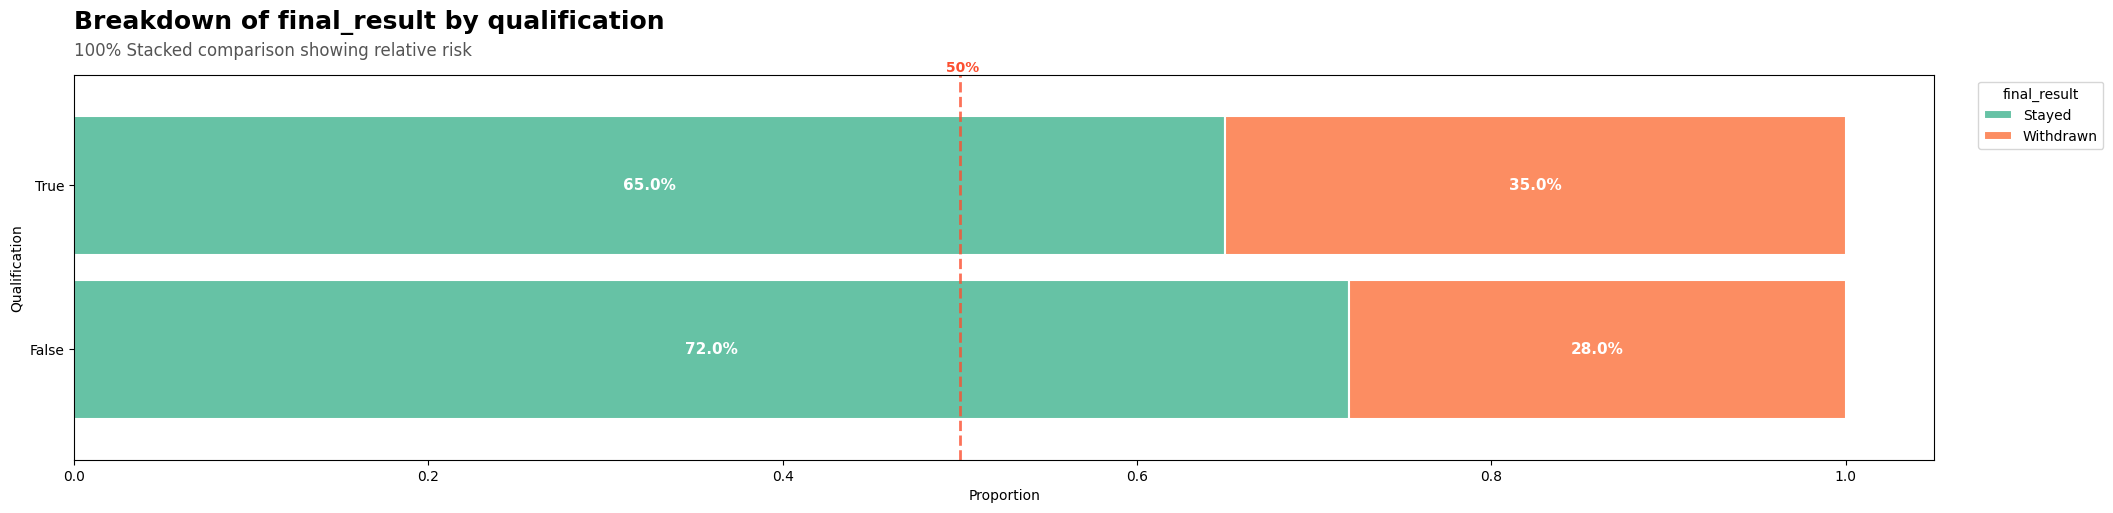

In [106]:
qualification_mask = (data['qualification']=='Below A') | (data['qualification']=='Nothing')
ct = pd.crosstab(qualification_mask,data['final_result'],normalize='index')
plt.figure(figsize=(24,5))
P.plot_stacked(ct,orient='h')

In [107]:
ct = pd.crosstab(qualification_mask,data['final_result'])
S.test_association(ct)


=== Categorical Association Test ===
Test Used:      Chi-Square Test
P-Value:        0.00000
Verdict:        Significant Dependence ✅
Strength:       Cramer's V = 0.075 (Weak)


In [108]:
ct = pd.crosstab(data['qualification'],data['final_result'])
S.test_association(ct)


=== Categorical Association Test ===
Test Used:      Chi-Square Test
P-Value:        0.00000
Verdict:        Significant Dependence ✅
Strength:       Cramer's V = 0.078 (Weak)


- ***by visuals we saw some of the values have higher withdrawn, but statistical analysis says both columns have weak association***

**imd_band**

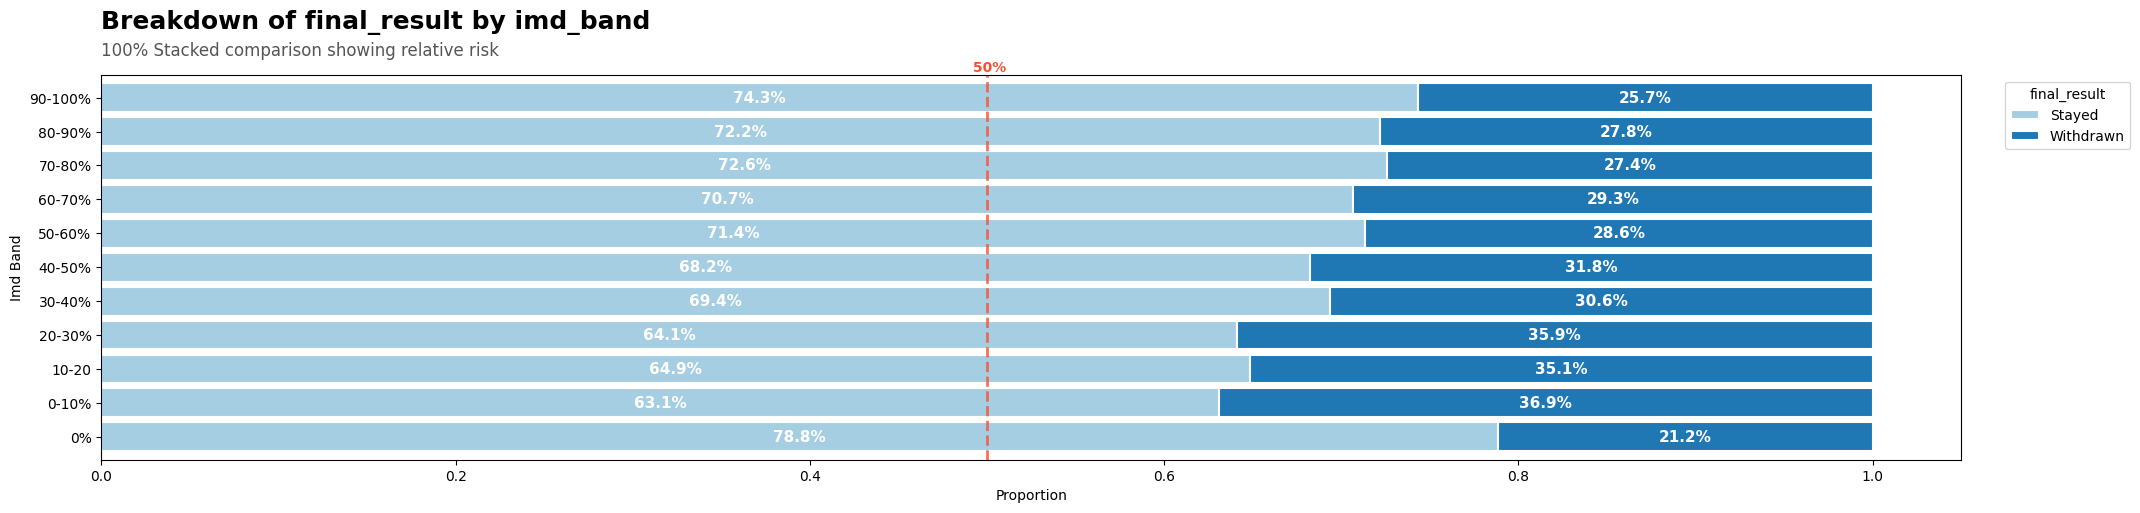

In [110]:
ct = pd.crosstab(data['imd_band'],data['final_result'],normalize='index')
plt.figure(figsize=(24,5))
P.plot_stacked(ct,orient='h')

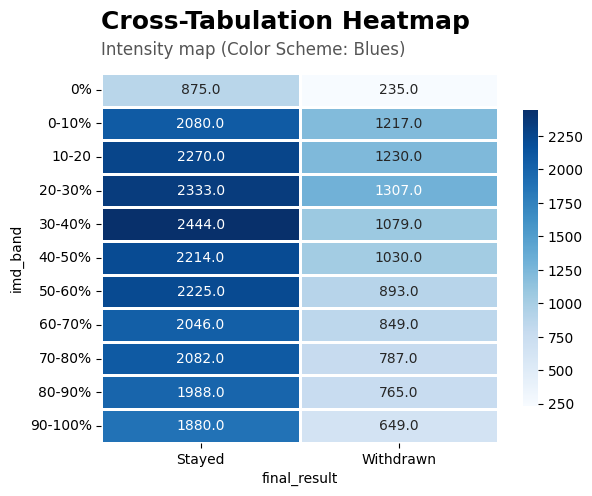

In [111]:
ct = pd.crosstab(data['imd_band'],data['final_result'])
P.plot_heatmap(ct)

In [112]:
S.test_association(ct)


=== Categorical Association Test ===
Test Used:      Chi-Square Test
P-Value:        0.00000
Verdict:        Significant Dependence ✅
Strength:       Cramer's V = 0.088 (Weak)


- ***by visuals we did not saw any specific pattern, and statistical test says both columns have weak associations***

**age_band**

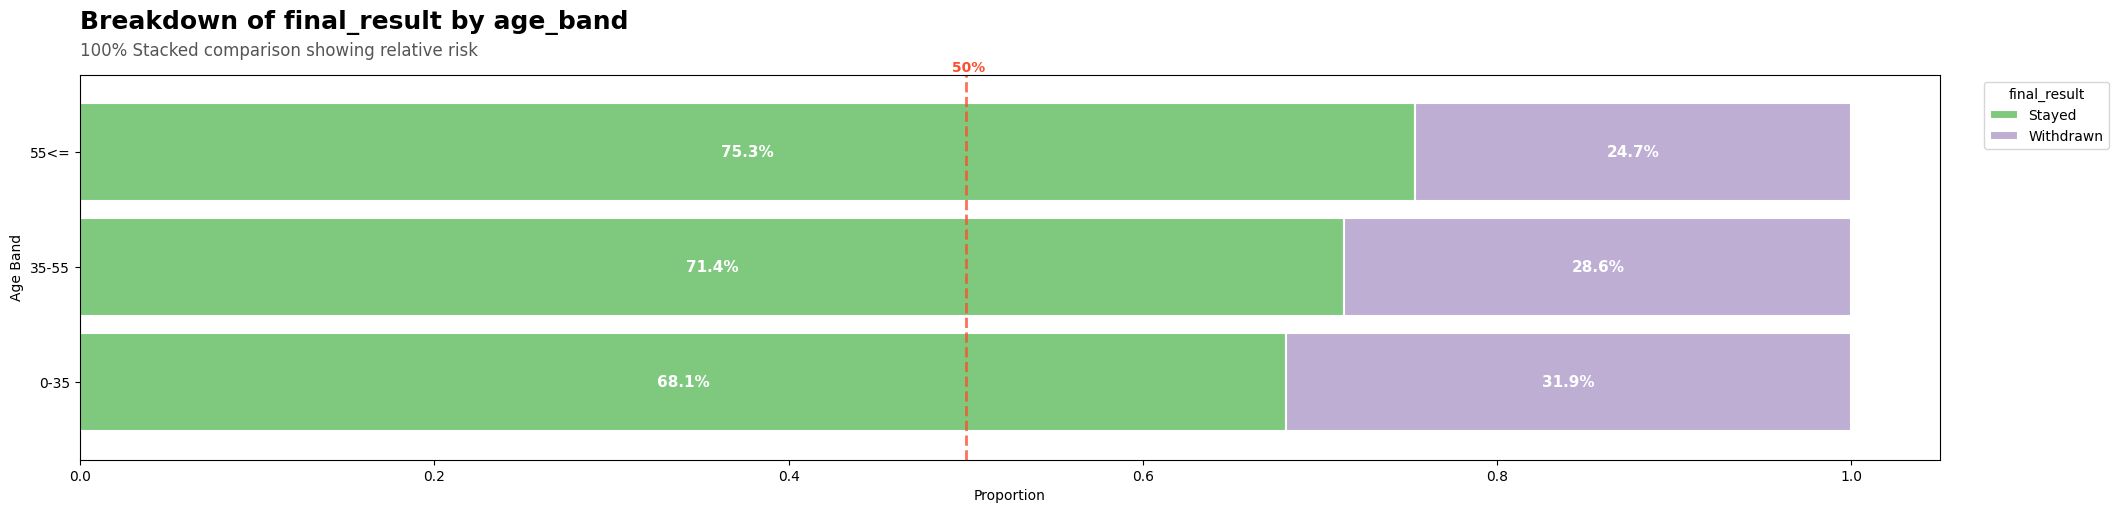

In [113]:
ct = pd.crosstab(data['age_band'],data['final_result'],normalize='index')
plt.figure(figsize=(24,5))
P.plot_stacked(ct,orient='h')

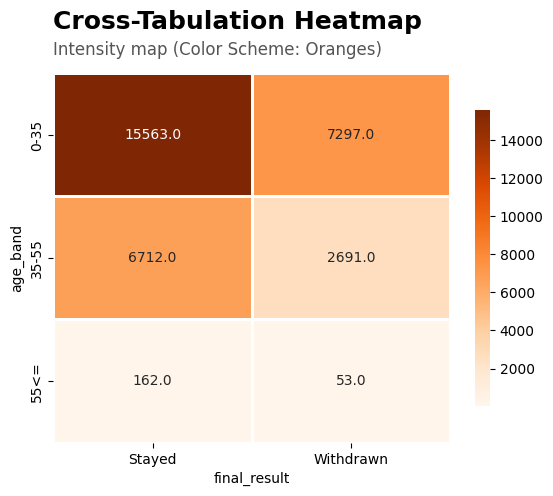

In [115]:
ct = pd.crosstab(data['age_band'],data['final_result'])

P.plot_heatmap(ct)

In [114]:
ct = pd.crosstab(data['age_band'],data['final_result'])

S.test_association(ct)


=== Categorical Association Test ===
Test Used:      Chi-Square Test
P-Value:        0.00000
Verdict:        Significant Dependence ✅
Strength:       Cramer's V = 0.034 (Weak)


- ***from visuals we saw pattern, but statistical test says the association is weak - maybe the sample size is small for 55+***

**disability**

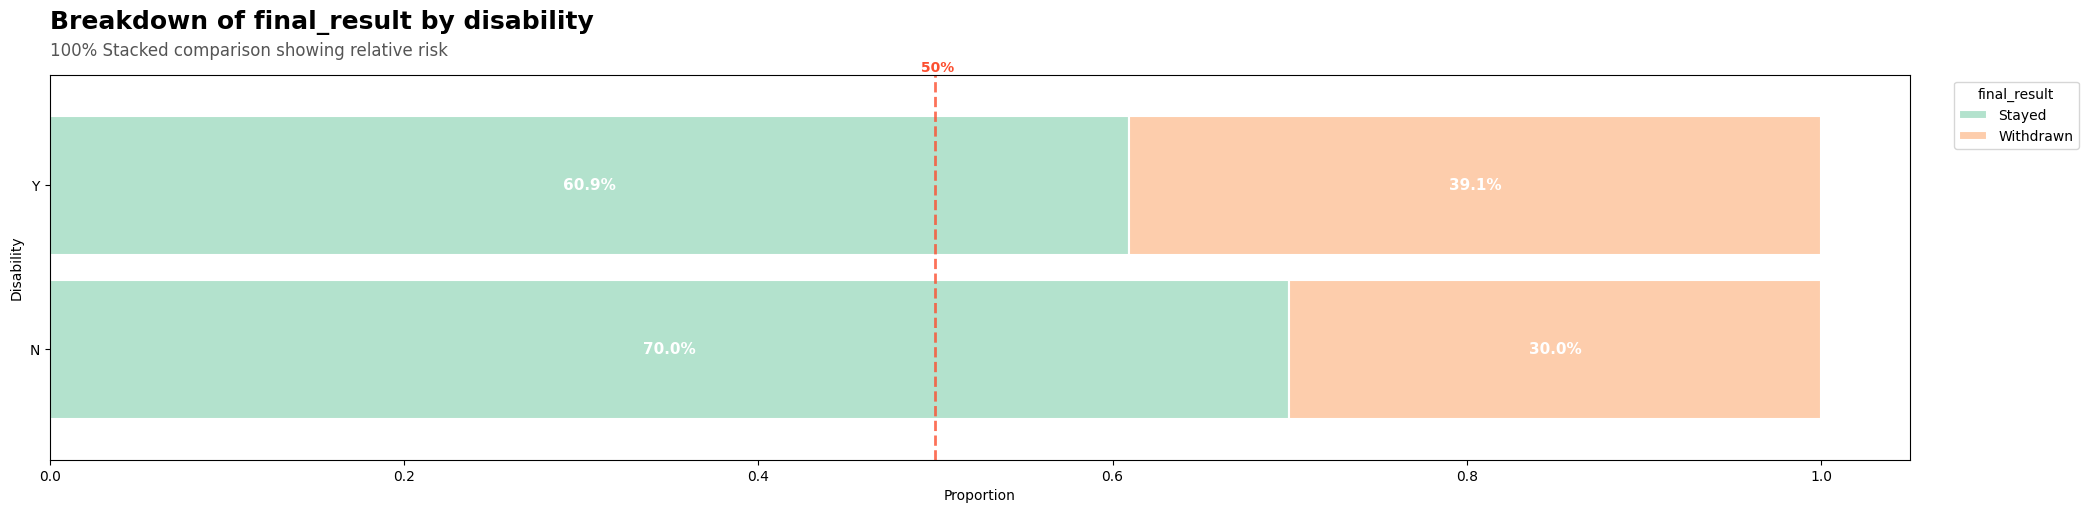

In [116]:
ct = pd.crosstab(data['disability'],data['final_result'],normalize='index')
plt.figure(figsize=(24,5))
P.plot_stacked(ct,orient='h')

In [117]:
ct = pd.crosstab(data['disability'],data['final_result'])

S.test_association(ct)


=== Categorical Association Test ===
Test Used:      Chi-Square Test
P-Value:        0.00000
Verdict:        Significant Dependence ✅
Strength:       Cramer's V = 0.058 (Weak)


- ***by visuals we did not saw anything specific, and statistical test says the association is weak***

**NUMERICAL COLUMNS WITH `final_result` COLUMN**

**studied credits**

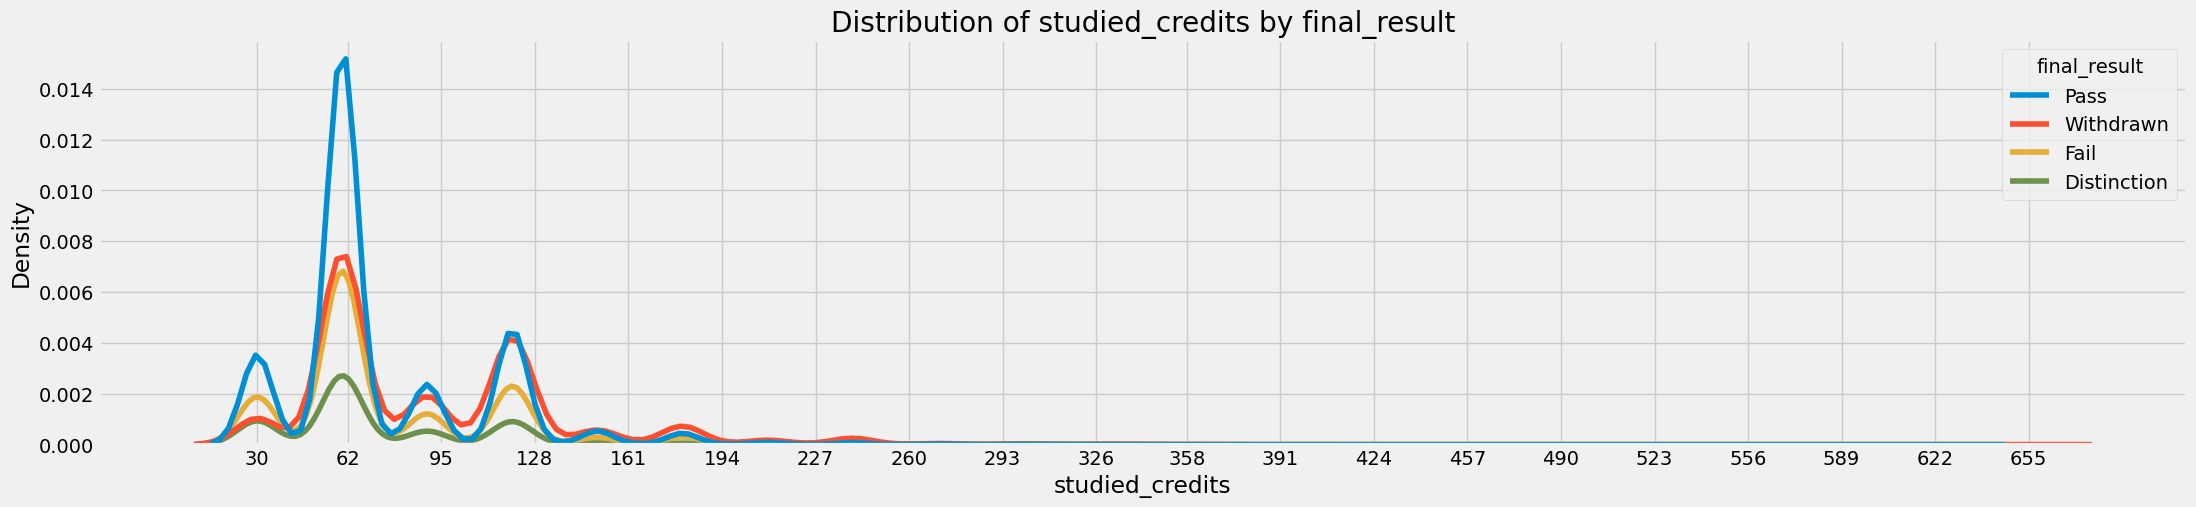

In [38]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='studied_credits',data= data,target='final_result')

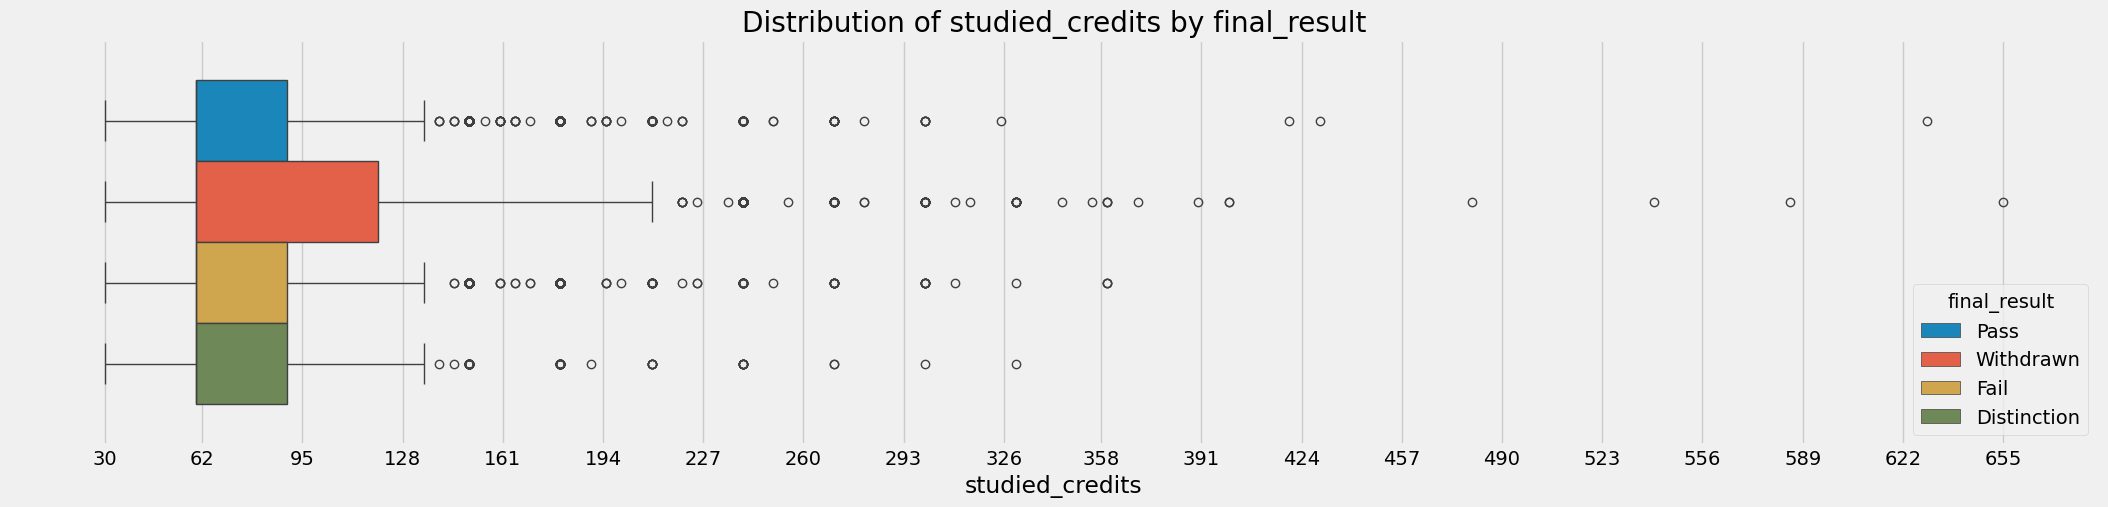

In [39]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='studied_credits',data= data,target='final_result')

In [40]:
data.groupby('final_result')['studied_credits'].mean().round(2)

final_result
Distinction    71.76
Fail           76.09
Pass           74.22
Withdrawn      91.43
Name: studied_credits, dtype: float64

**average studied credit showing high mean compared to others for withdrawn candidates**

In [41]:
S.numerical_test(data,'final_result','studied_credits','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: weak


**groups are different in studied_credits, but strength is weak**

***

**num_of_prev_attempts**

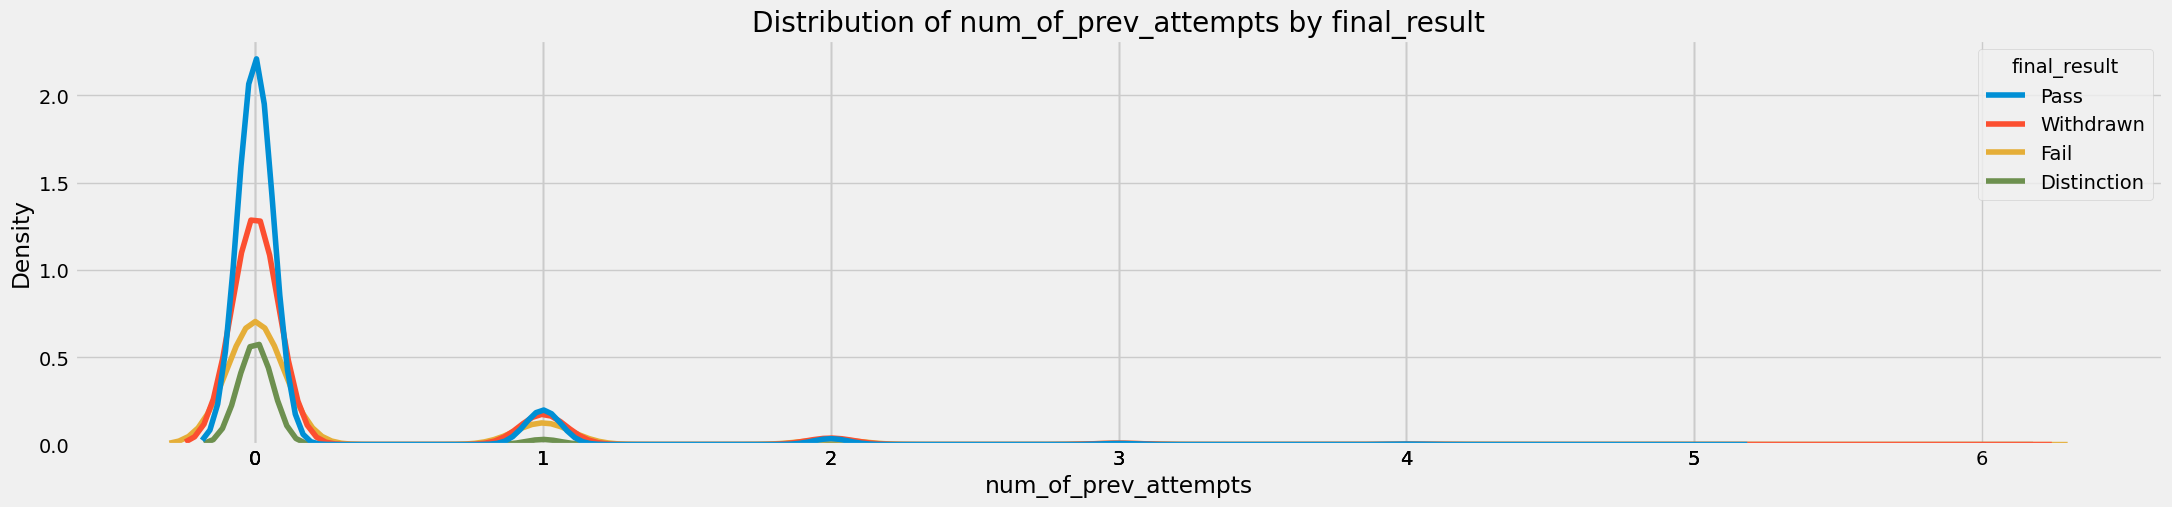

In [42]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='num_of_prev_attempts',data= data,target='final_result')

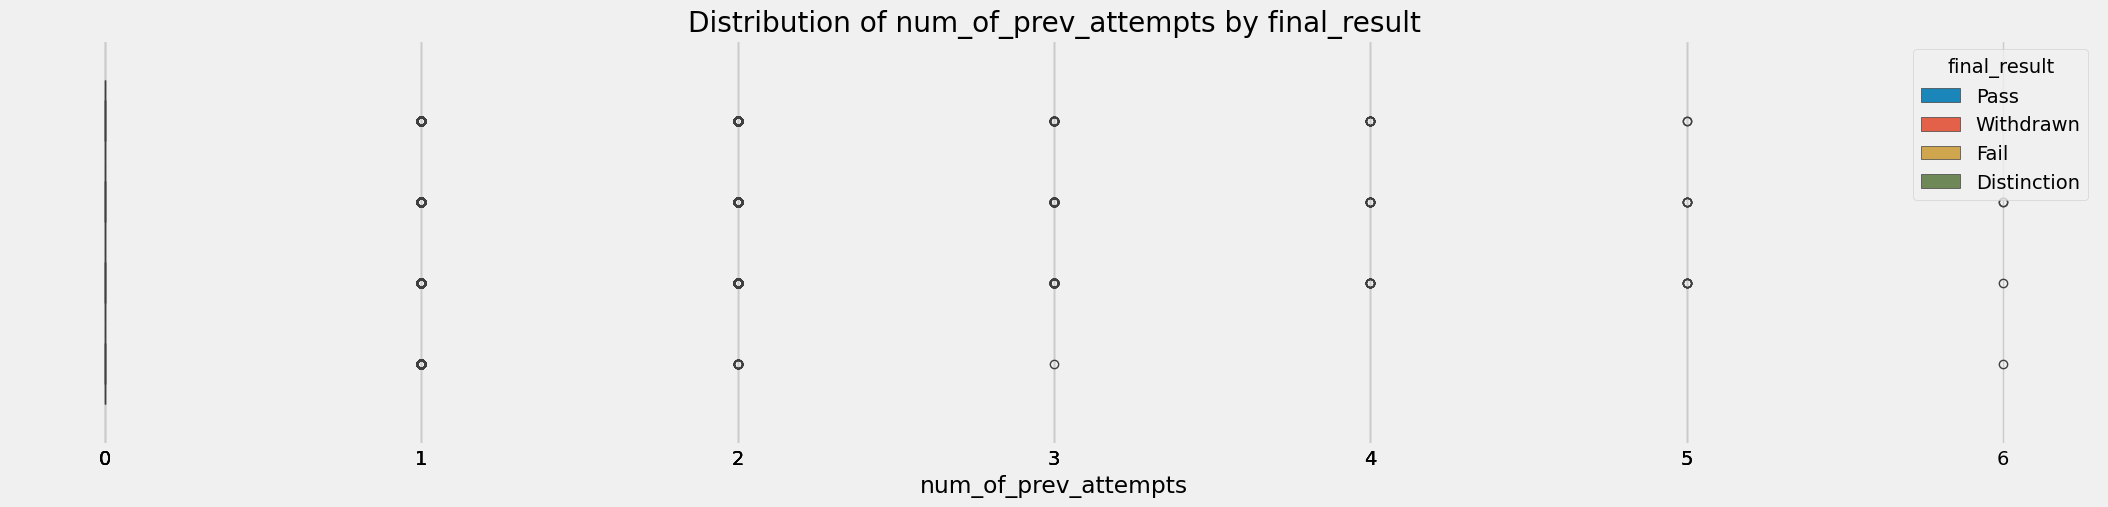

In [43]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='num_of_prev_attempts',data= data,target='final_result')

In [44]:
data.groupby('final_result')['num_of_prev_attempts'].mean().round(2)

final_result
Distinction    0.06
Fail           0.25
Pass           0.12
Withdrawn      0.19
Name: num_of_prev_attempts, dtype: float64

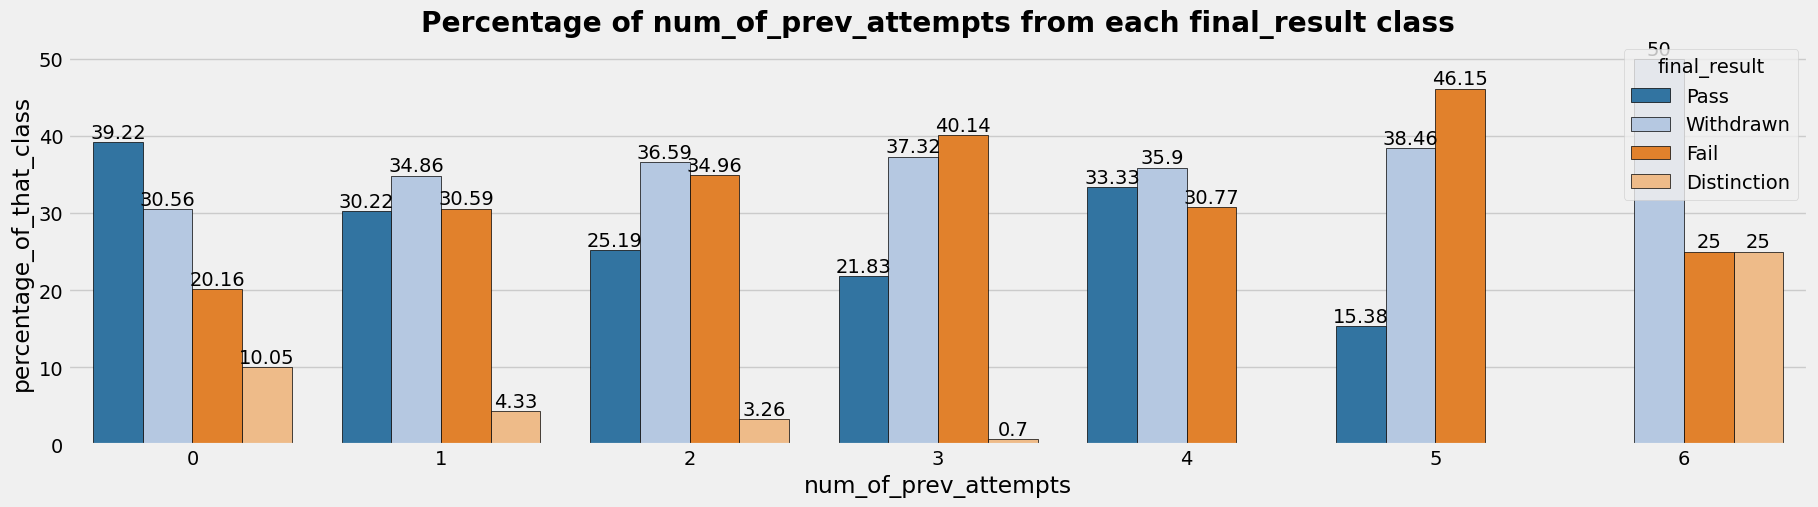

In [45]:
plt.figure(figsize=(20,5))
P.percentage_in_that_class(column='num_of_prev_attempts',data=data,target='final_result',orient='v')

**num of previous attempt is showing higher the attempts, more of the chance of readmission**

In [46]:
ct = pd.crosstab(data['num_of_prev_attempts'],data['final_result'])

S.chi_sqared_test(ct)

Chi-square p-value: 0.00000
Reject null (groups different)
Cramer's V: 0.073 → Weak


**althoug num_of_prev_attempts have weak relationship with target column**

***

**date_registration**

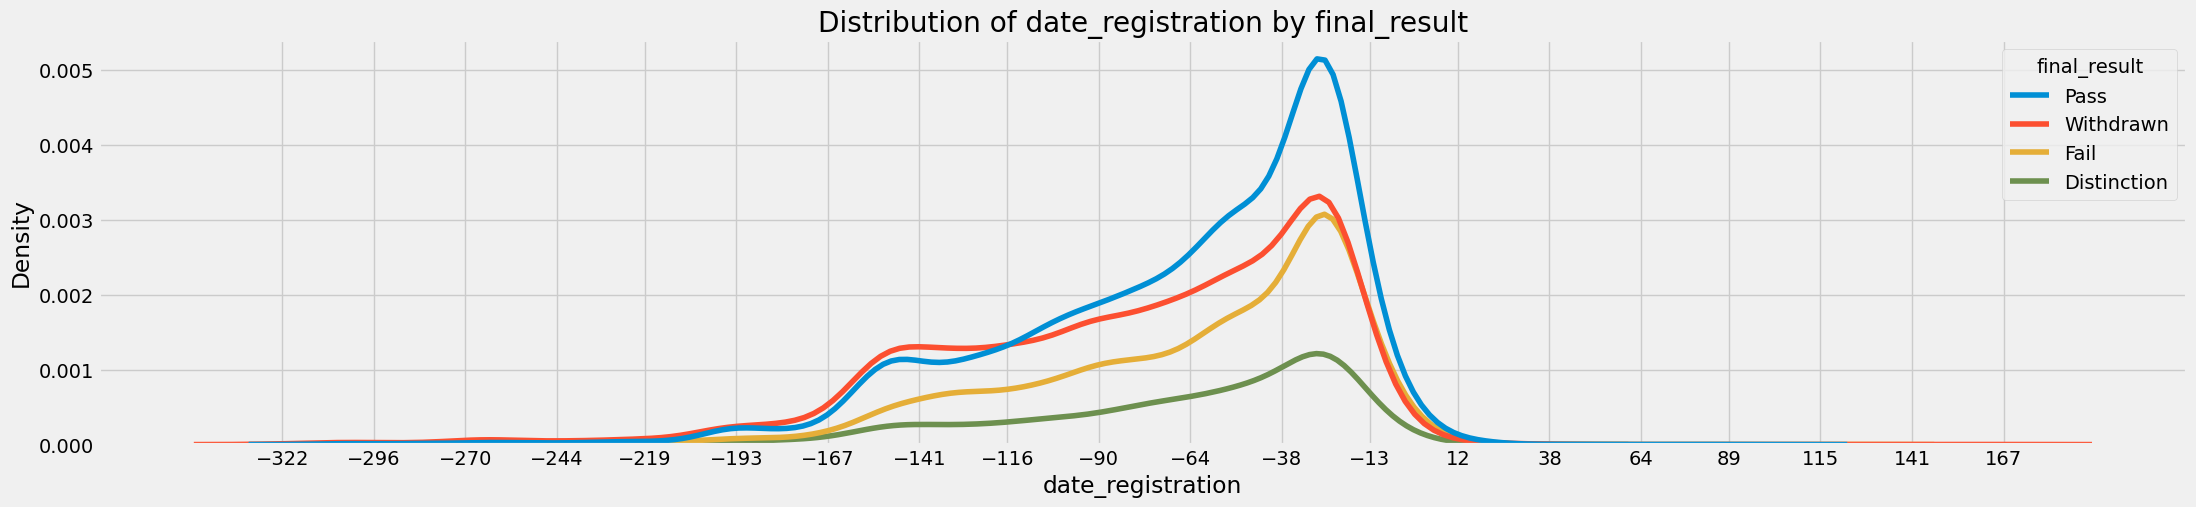

In [47]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='date_registration',data= data,target='final_result')

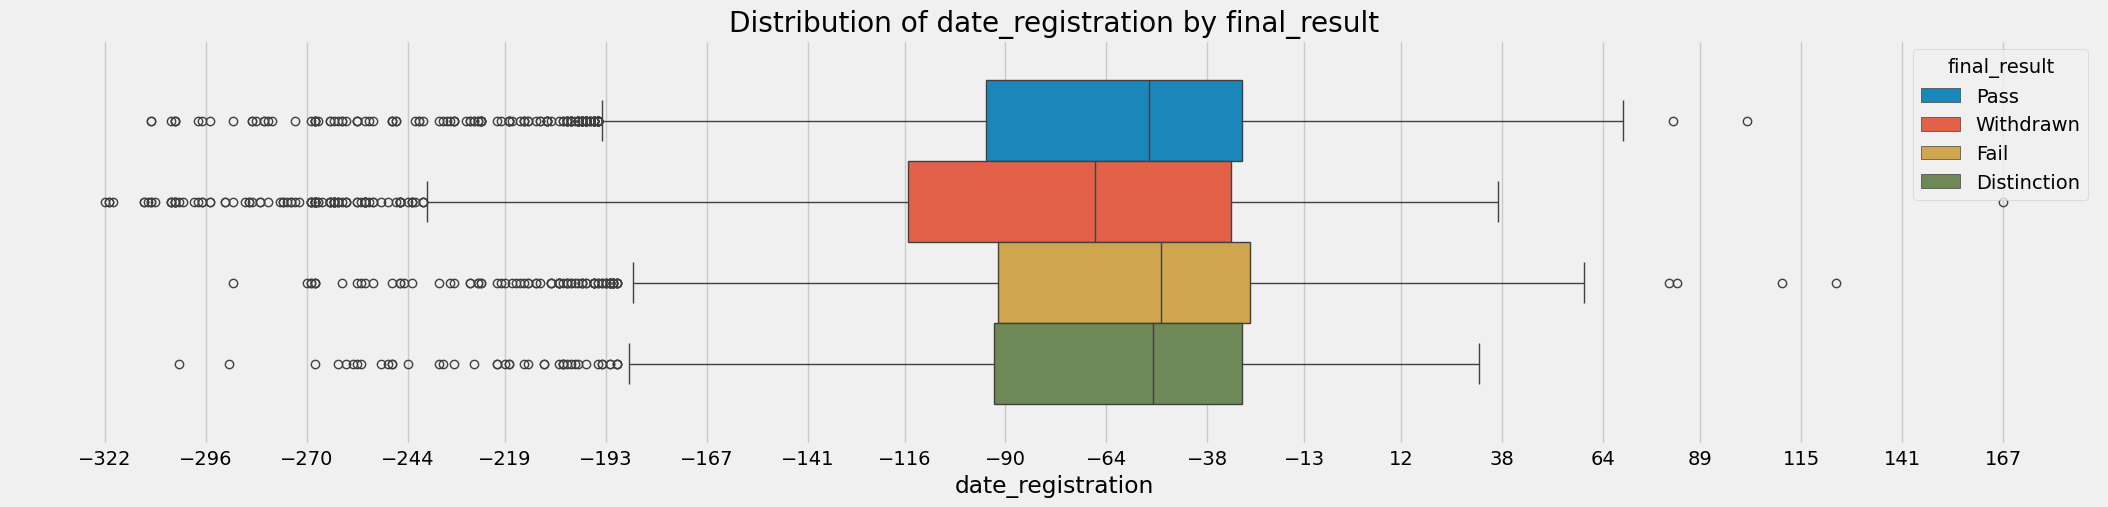

In [48]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='date_registration',data= data,target='final_result')

In [49]:
data.groupby('final_result')['date_registration'].mean().round(2)

final_result
Distinction   -65.64
Fail          -62.81
Pass          -66.71
Withdrawn     -78.35
Name: date_registration, dtype: float64

**Withdrawn candidates ae showing less mean for date_registration**

In [50]:
S.numerical_test(data,'final_result','date_registration','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: weak


**groups are different in both withdrawn and not withdrawn class, with a weak realtionship**

***

**total_vle_used**

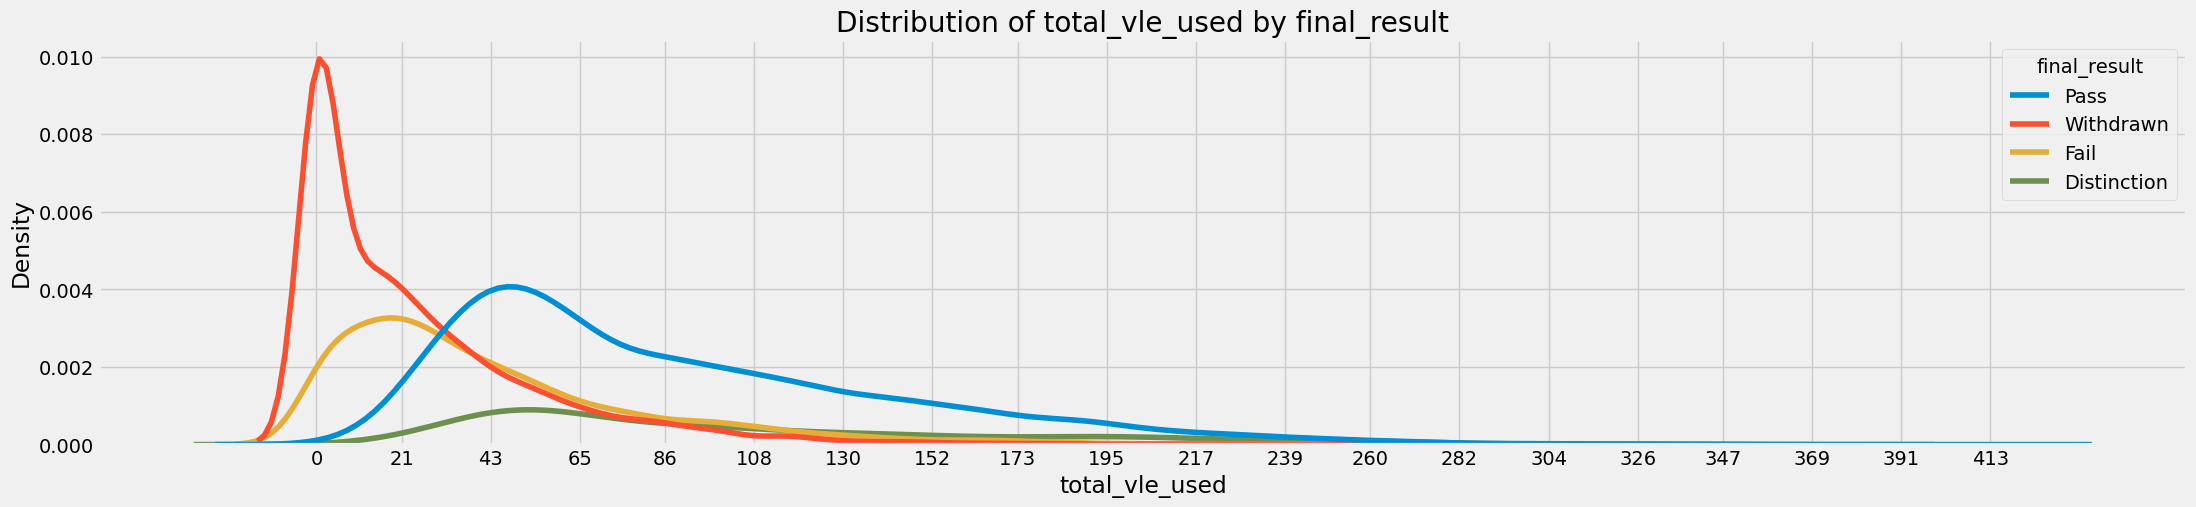

In [51]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='total_vle_used',data= data,target='final_result')

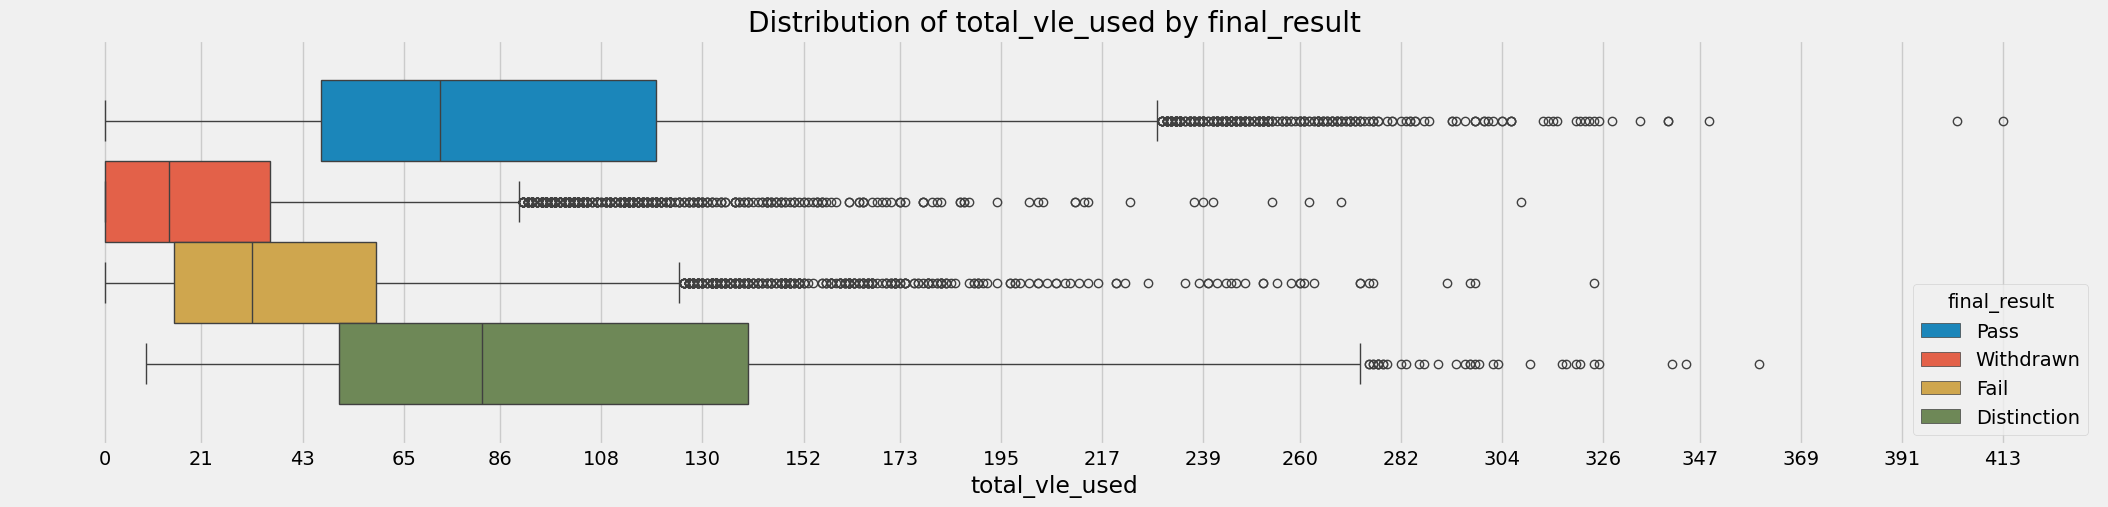

In [52]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='total_vle_used',data= data,target='final_result')

In [53]:
data.groupby('final_result')['total_vle_used'].mean().round(2)

final_result
Distinction    102.45
Fail            43.08
Pass            89.06
Withdrawn       24.23
Name: total_vle_used, dtype: float64

**for withdrawn class, total_vle_used is showing the least mean value**

In [54]:
S.numerical_test(data,'final_result','total_vle_used','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: strong


**groups are different in total_vle_used column, with a strong relationship**

***

**total_clicks**

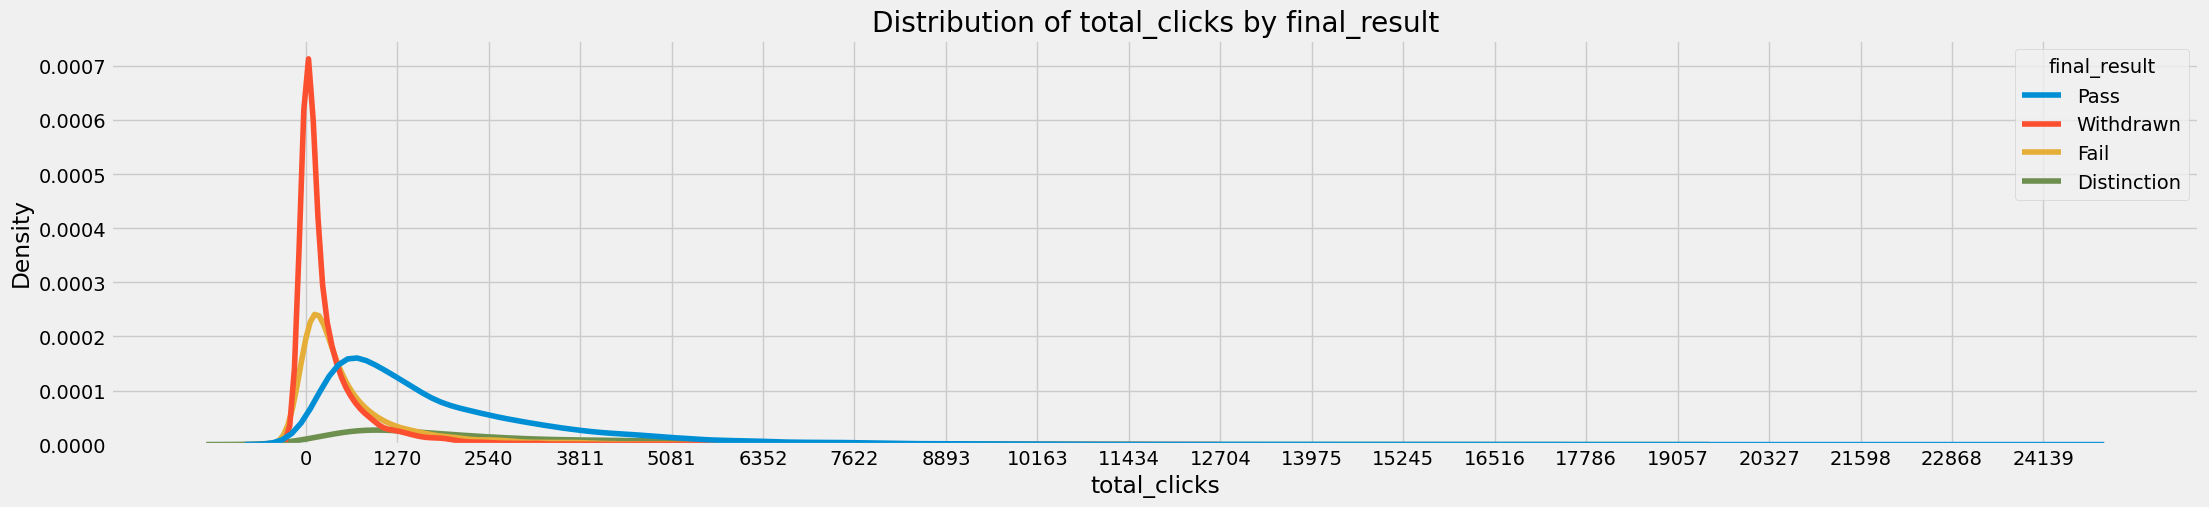

In [55]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='total_clicks',data= data,target='final_result')

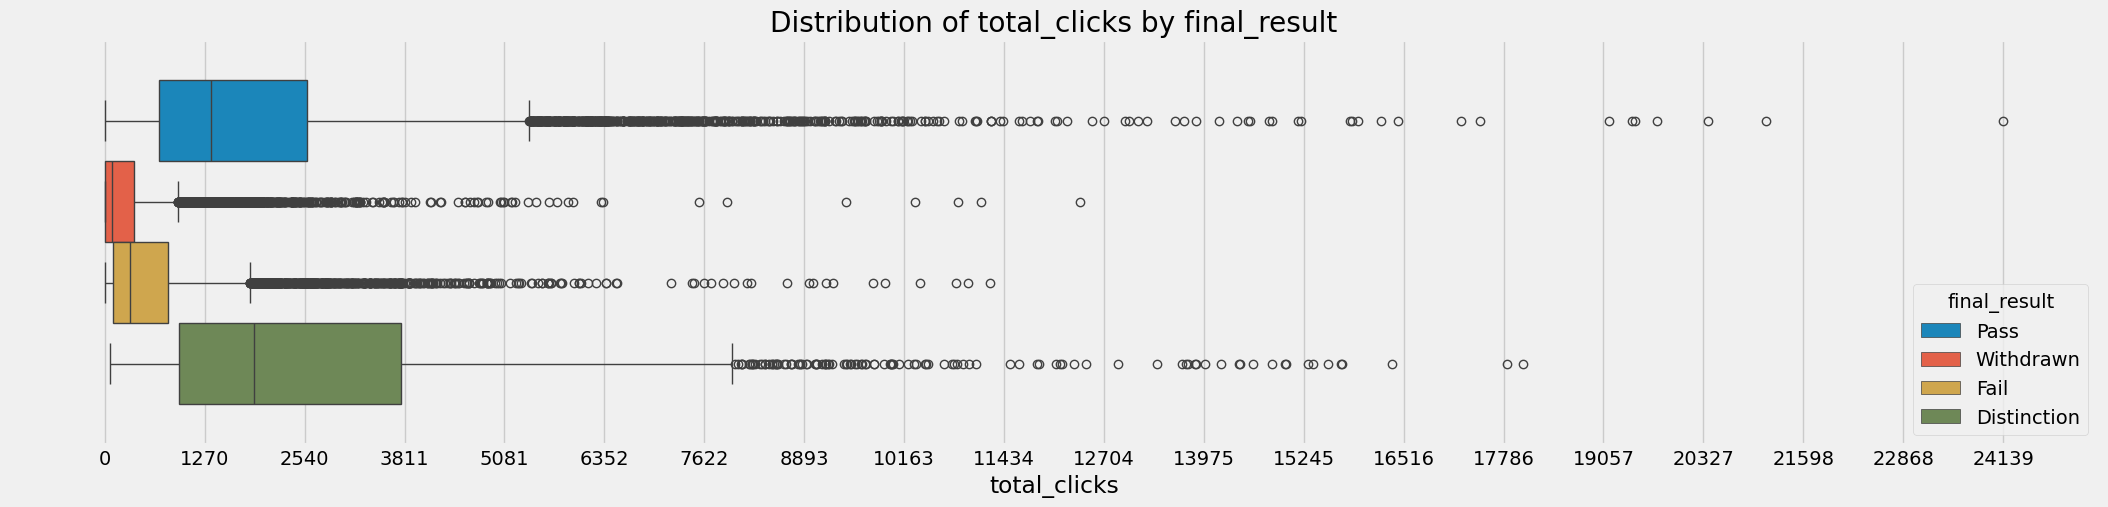

In [56]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='total_clicks',data= data,target='final_result')

In [57]:
data.groupby('final_result')['total_clicks'].mean().round(2)

final_result
Distinction    2666.76
Fail            651.85
Pass           1921.81
Withdrawn       313.95
Name: total_clicks, dtype: float64

**for withdrawn class, average total mean is the lowest**

In [58]:
S.numerical_test(data,'final_result','total_clicks','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: strong


**groups are different for total_clicks column, with strong relationship**

***

**total_assessments**

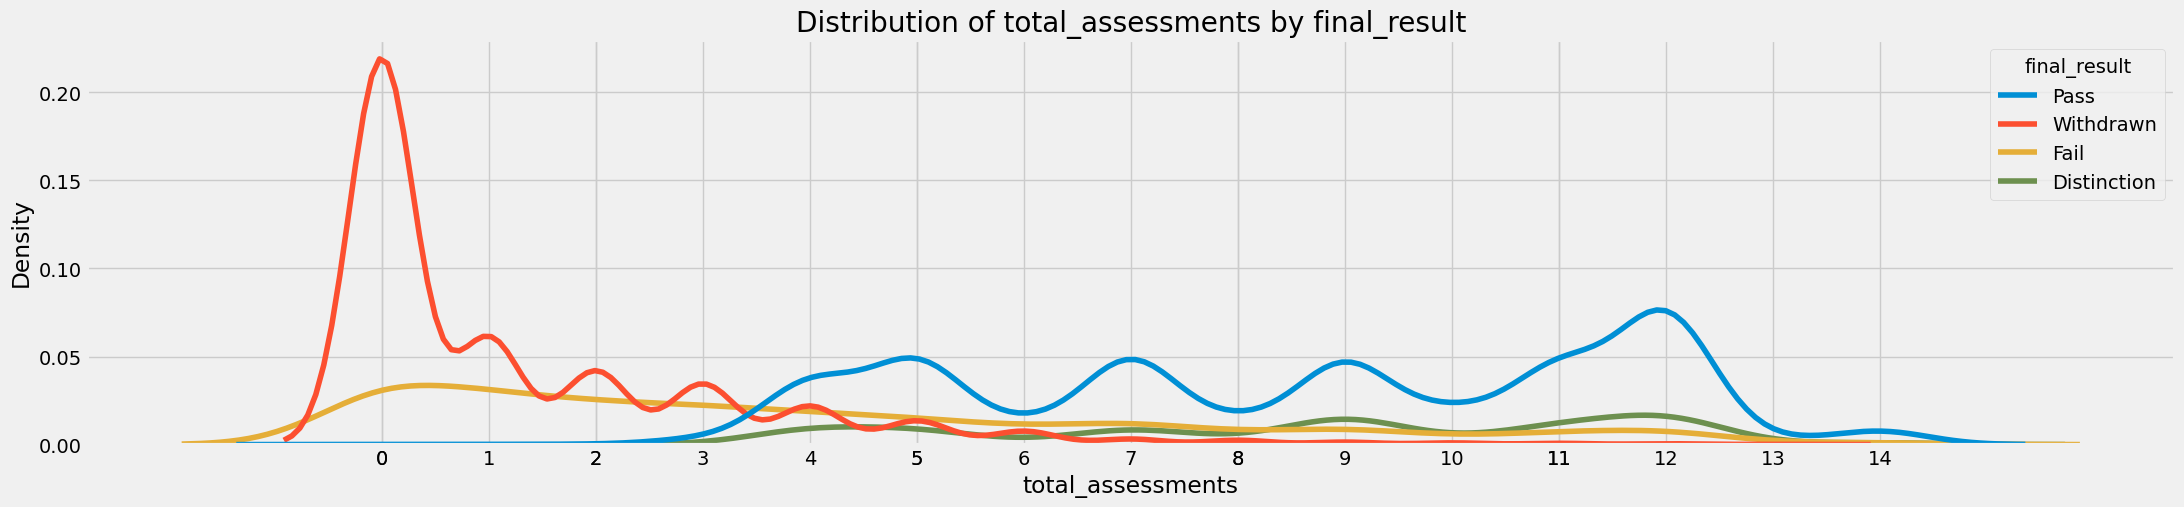

In [59]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='total_assessments',data= data,target='final_result')

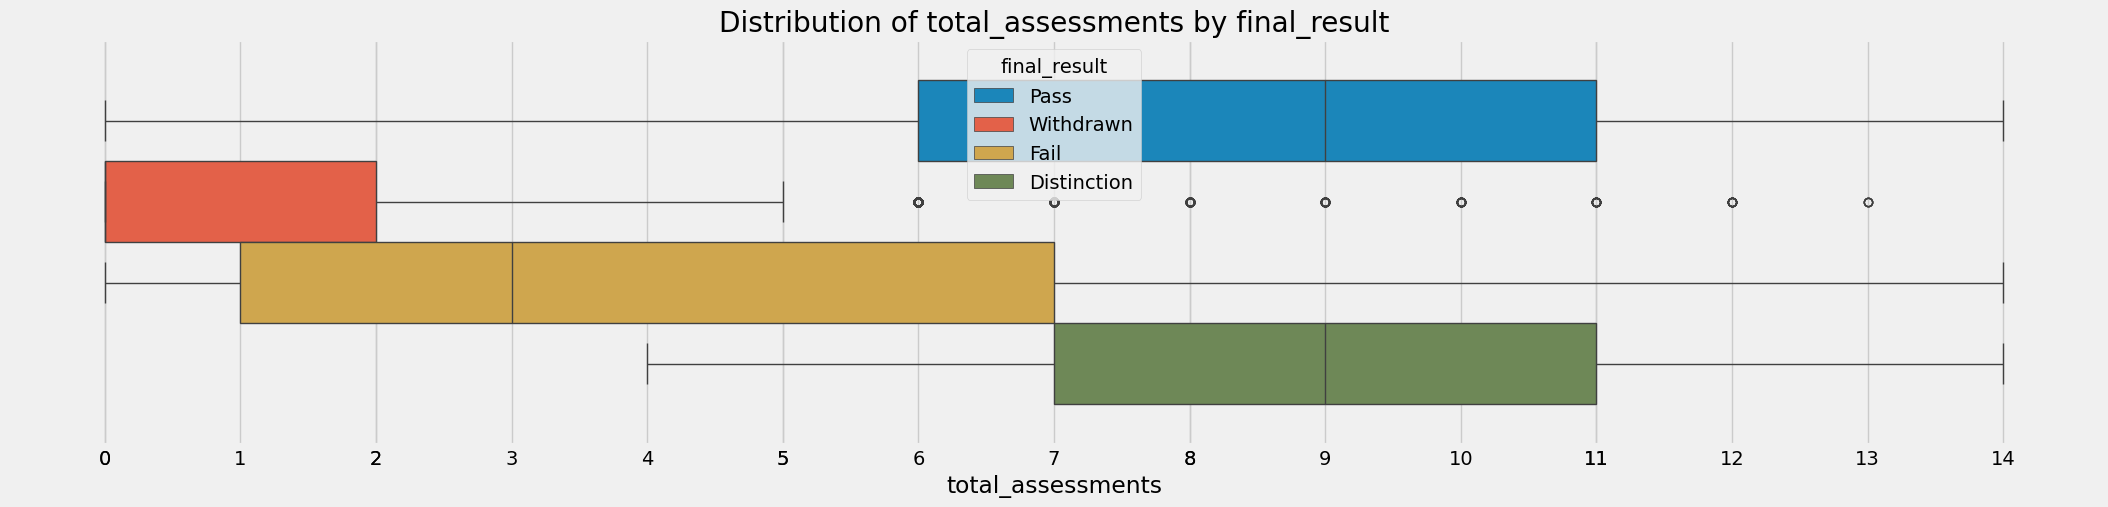

In [60]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='total_assessments',data= data,target='final_result')

In [61]:
data.groupby('final_result')['total_assessments'].mean().round(2)

final_result
Distinction    8.71
Fail           4.04
Pass           8.58
Withdrawn      1.29
Name: total_assessments, dtype: Float64

**mean value for total_assessments is least for withdrawn candidates**

In [62]:
S.numerical_test(data,'final_result','total_assessments','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: strong


**groups are different for total_assessments class, with strong relationship**

***

**attempted_assessments**

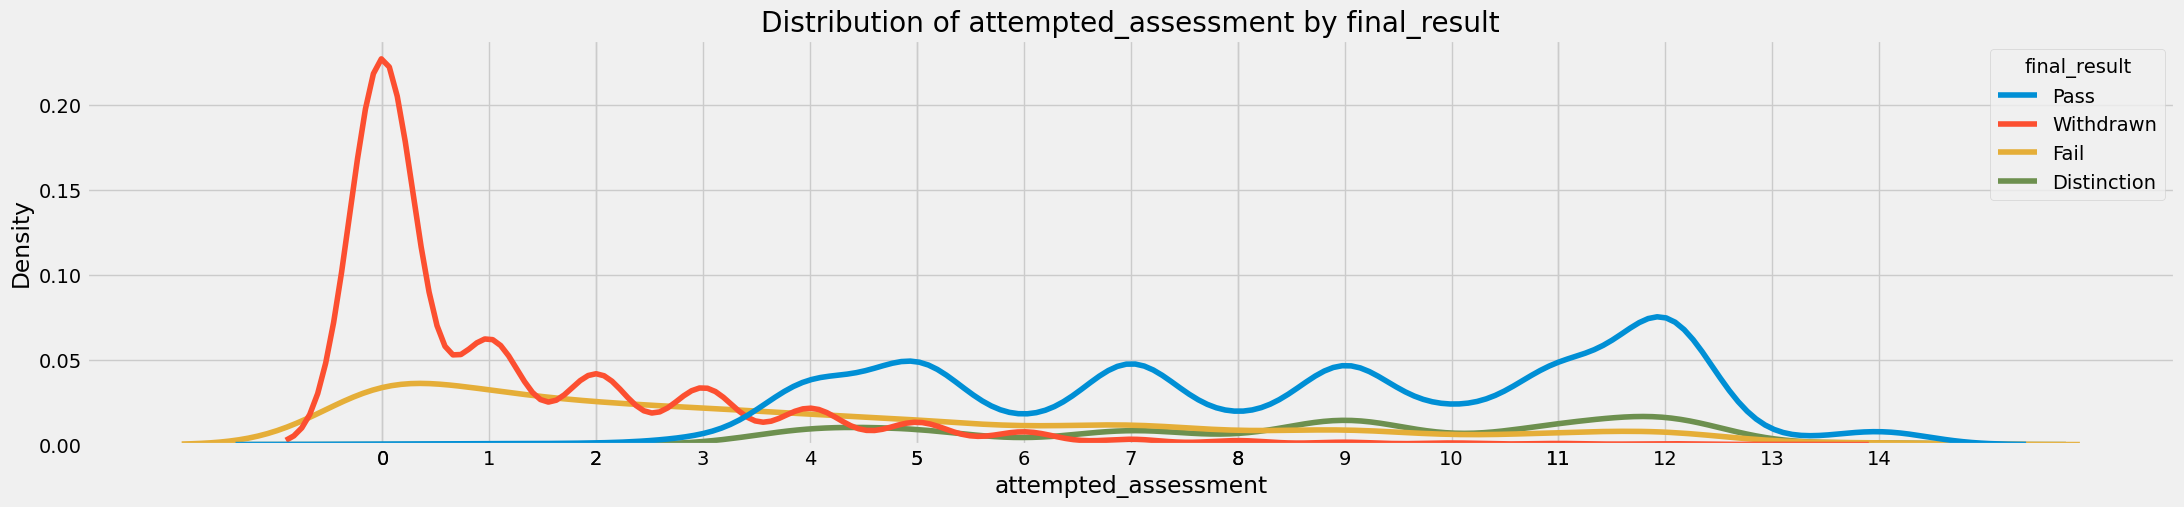

In [63]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='attempted_assessment',data= data,target='final_result')

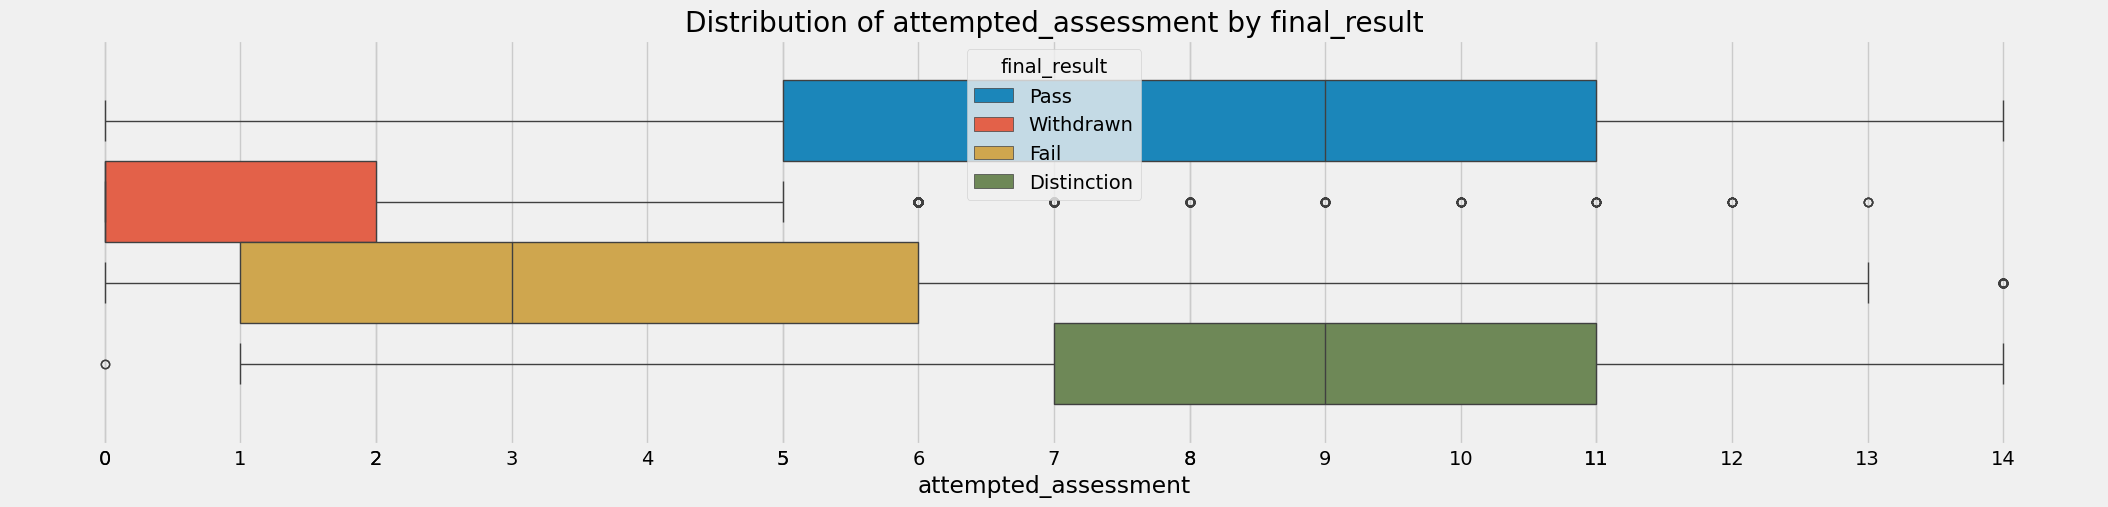

In [64]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='attempted_assessment',data= data,target='final_result')

In [65]:
data.groupby('final_result')['attempted_assessment'].mean().round(2)

final_result
Distinction    8.68
Fail           3.92
Pass           8.53
Withdrawn      1.25
Name: attempted_assessment, dtype: Float64

**mean of total_attempted_assessment is lowest for withdrawn class**

In [66]:
S.numerical_test(data,'final_result','attempted_assessment','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: strong


**attempted assessments groups for withdrawn class is different, with strong relationship**

***

**non_attempted_assessments**

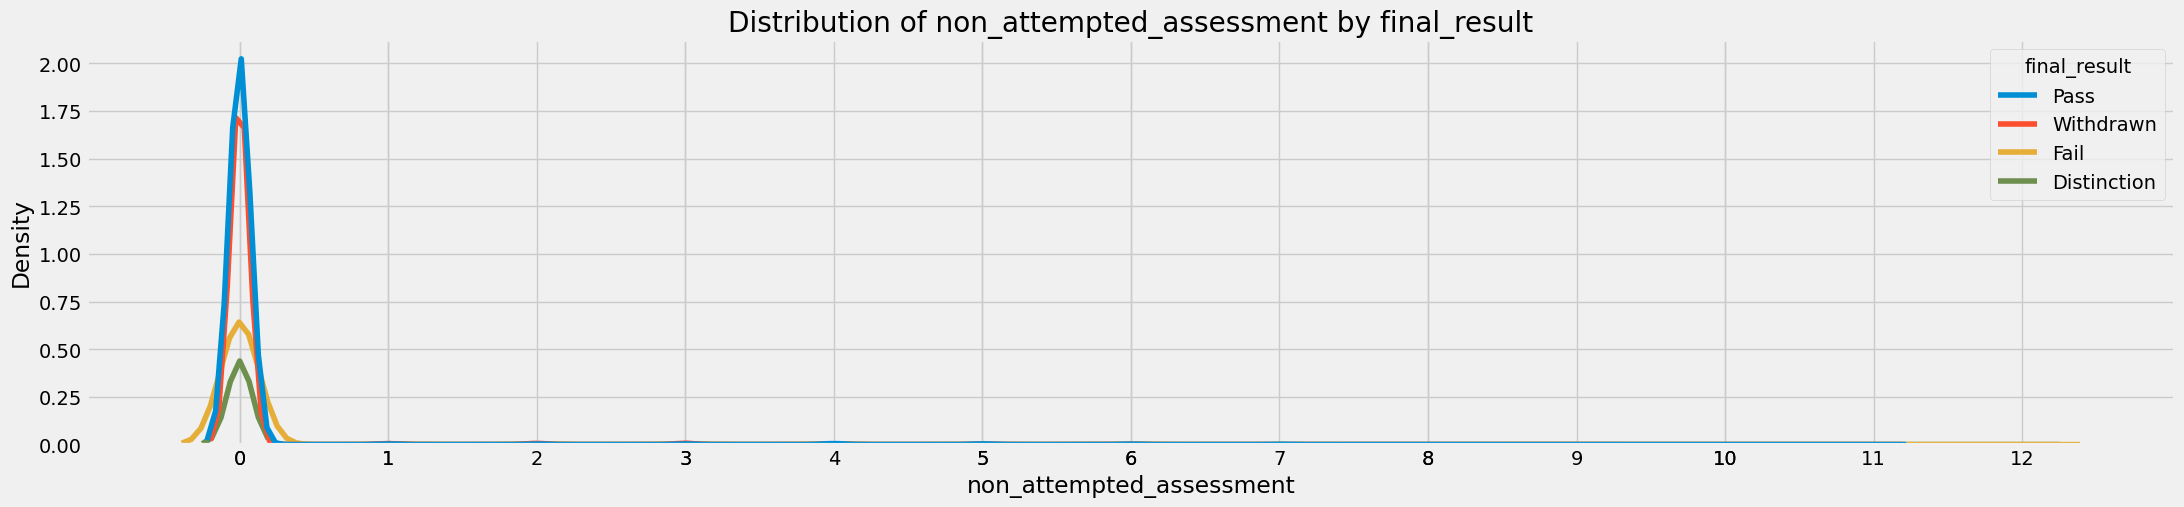

In [67]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='non_attempted_assessment',data= data,target='final_result')

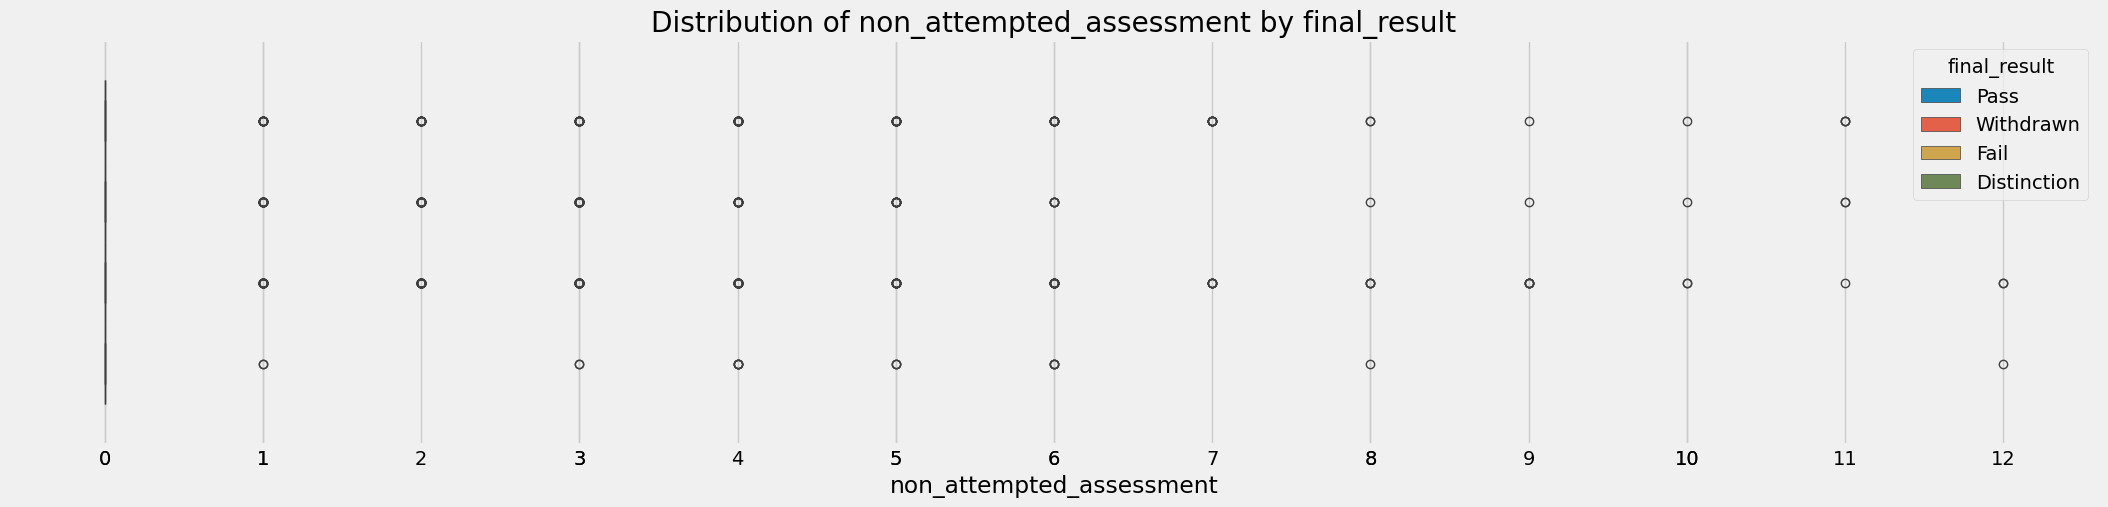

In [68]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='non_attempted_assessment',data= data,target='final_result')

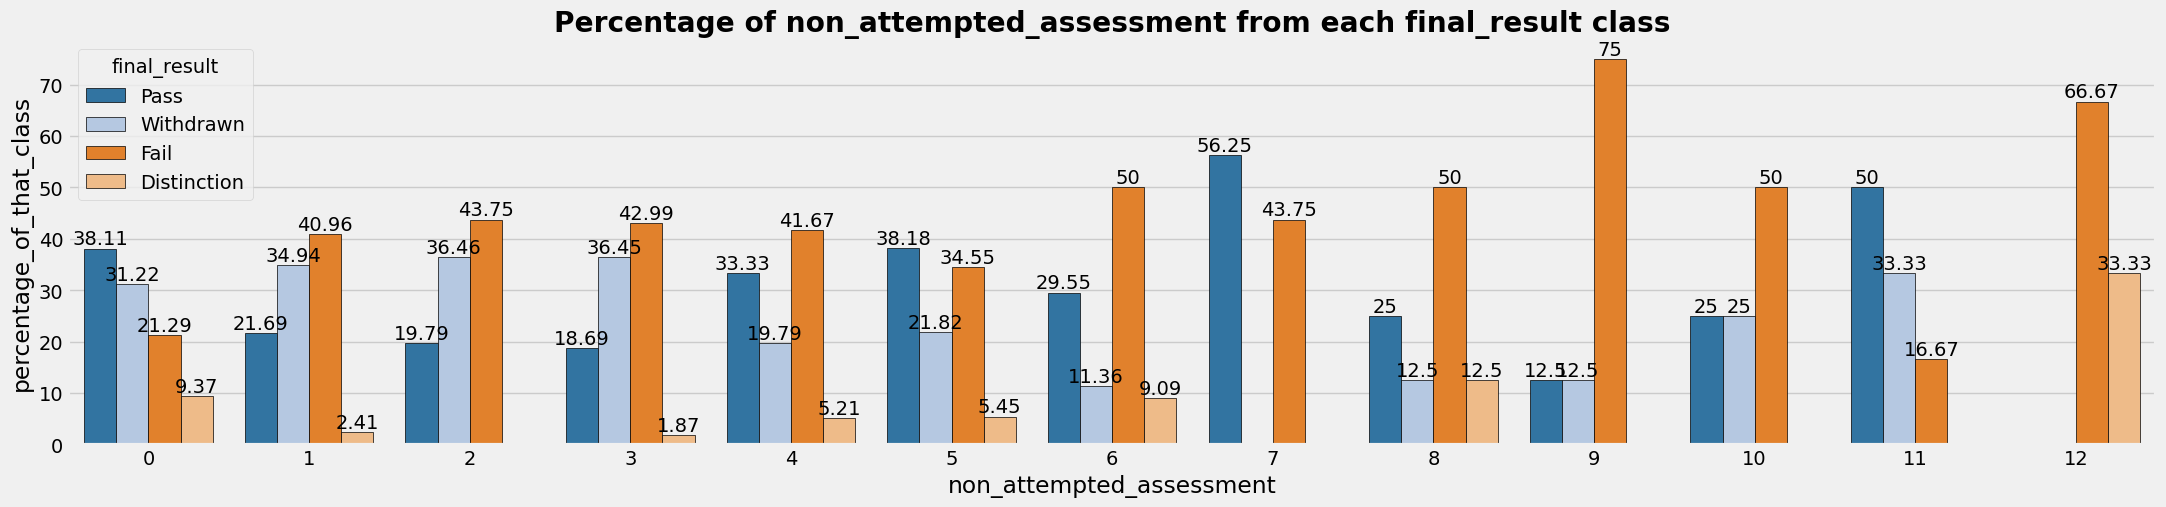

In [69]:
plt.figure(figsize=(24,5))
P.percentage_in_that_class(column='non_attempted_assessment',data=data,target='final_result',orient='v')

In [70]:
data.groupby('final_result')['non_attempted_assessment'].mean().round(2)

final_result
Distinction    0.03
Fail           0.12
Pass           0.05
Withdrawn      0.04
Name: non_attempted_assessment, dtype: Float64

**did not find any particular relationship**

***

**average_score**

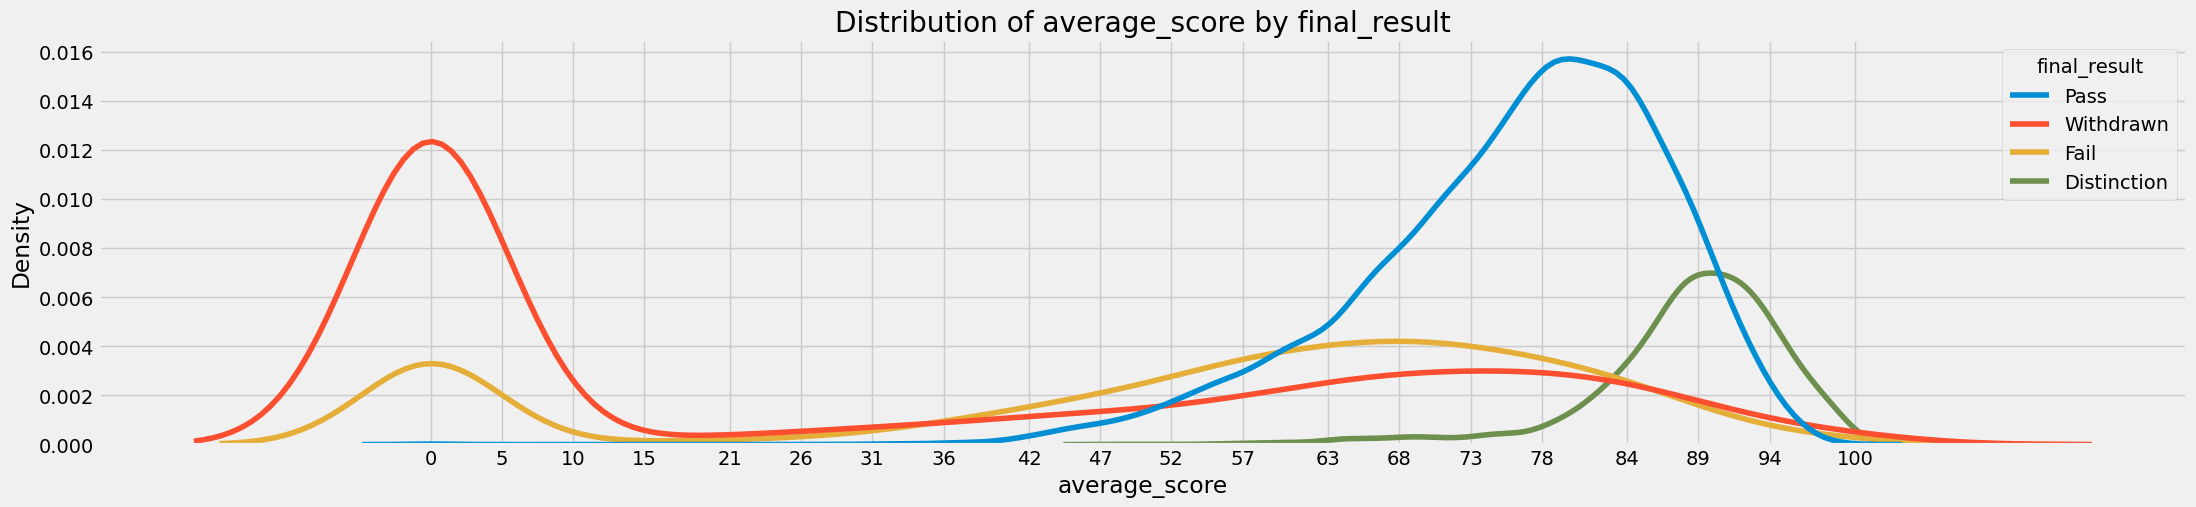

In [71]:
plt.figure(figsize=(24,5))
P.kde_in_all_class(column='average_score',data= data,target='final_result')

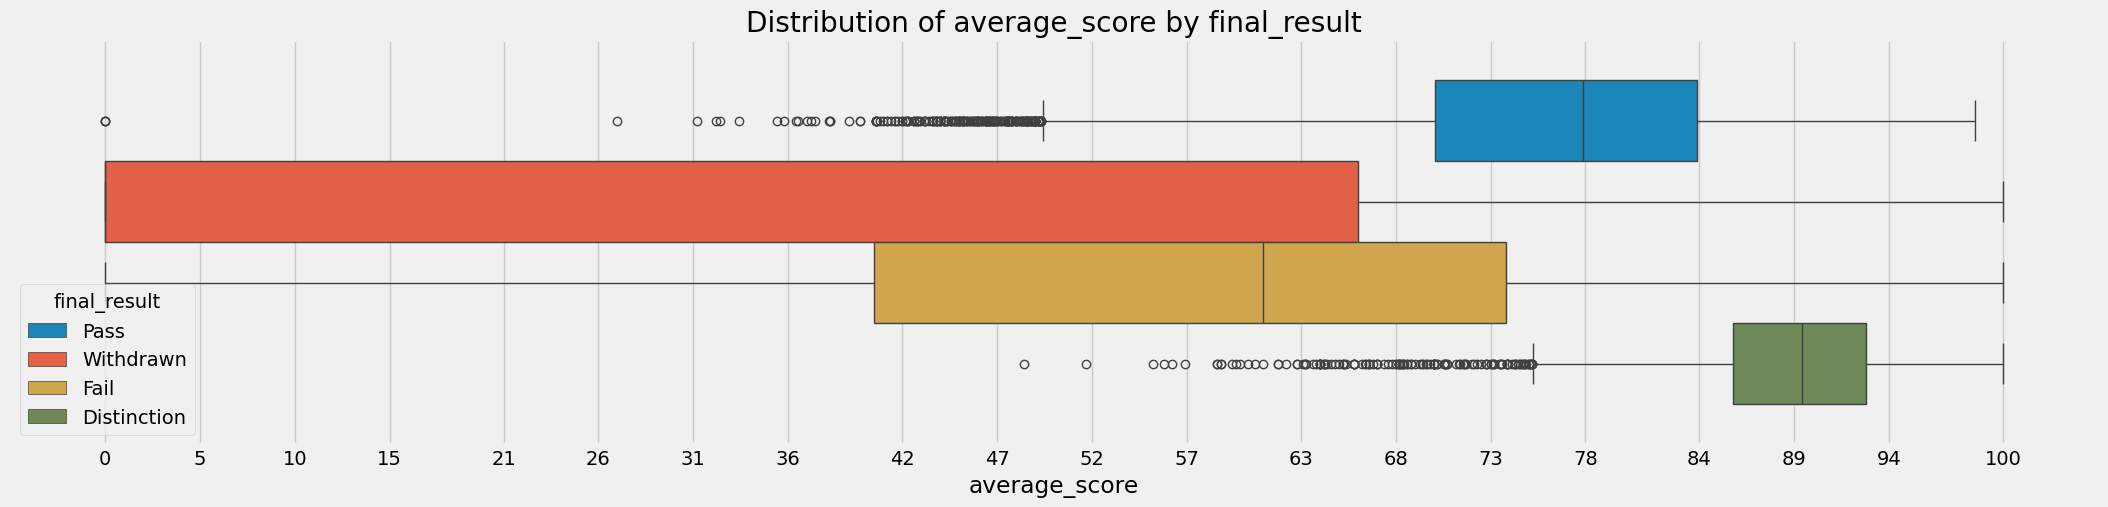

In [72]:
plt.figure(figsize=(24,5))
P.box_in_all_class(column='average_score',data= data,target='final_result')

In [73]:
data.groupby('final_result')['average_score'].mean().round(2)

final_result
Distinction    88.49
Fail           52.51
Pass           76.16
Withdrawn      29.50
Name: average_score, dtype: float64

**mean value of average score in withdrawn class is the least**

In [74]:
S.numerical_test(data,'final_result','average_score','Withdrawn')

Data has normal distribution so doing ttest_ind ->
Data do not have equal variance
Doing ttest - with equal variance false...
T-test p-value: 0.00000 → Reject null (groups different)
Strength of ttest: strong


**groups are different for withdrawn class, with strong relationship**

***

### ***Findings from bivariate analysis with target column***

***Categorical with final_result***

- `CCC` value in code_module is showing high percentage of withdrawn observations, after doing statistical analysis we can validate that `code_module` have weak relationship with final result column

- `no fromal quals` value in highest_education is showing high percentage of withdrawn observations, after doing statistical test we can validate a moderate relationship with `final_result`

- `imd_band` is showing a relationship, smaller the imd_band more the withdrawn observation, but after doing statistical analysis we can see that there is a weak relationship between `imd_band` and `final_result` column

- `age_band` is showing higher the `age_band` less the chance of withdrawn, but after doing statistical test we see that the relationship is weak

- `Y` in `disability` is showing high percentage of withdrawn, after doing statistical test, we can validate that there is weak relationship between `disability` and `final_result`

***Numerical with final_result***

- for `withdrawn` category `studied_credits` column have high mean compared to other categories, after doing statistical test we can validate that students who used high credits are more likely to withdraw but the strength of relationship is weak

- `num_of_previous_attempt` is showing relatively high percentage of withdrawn for value 6 but the relationship is weak

- `date_registration` is showing early registration have higher withdrawn with a weak relationship

- `total_vle_used` is showing that less vle usage leads to higher withdrawn, with a strong relationship

 - `total_click` is showing for withdrawn category average total_click is lowest, with a strong relationship

- `total_assessments` is showing for withdrawn category average total_assessments is lowest, with a strong relationship

- `attempted_assessment` is showing less the value is higher the chance of withdrawn, with a strong relationship

- `average_score` is showing low score leads to high withdrawn value, with a strong relationship